In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Importing data and having cursory look at it

In [2]:
df = pd.read_csv("bank.csv",)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Input variables:
#### Bank Client Data:
1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)   
4 - education (categorical: 'basic.4y' ,'basic.6y' ,'basic.9y' ,'high.school' ,'illiterate' ,'professional.course' ,'university.degree','unknown')   
5 - default: has credit in default? (categorical: 'no','yes','unknown')   
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  

#### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')  
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  

#### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  

#### Output variable (desired target):
16 - y - has the client subscribed a term deposit? (binary: 'yes','no')  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<AxesSubplot:>

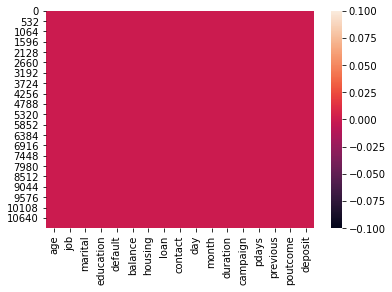

In [4]:
sns.heatmap(df.isnull())

There are no missing values in any of the columns

In [5]:
df[(df['deposit'] == 'yes')].shape[0]/df.shape[0]

0.4738398136534671

In [6]:
duration_seconds = [0,120,240,360]
for i in duration_seconds:
    percent_yes = df[(df['duration']> i) & (df['deposit'] == 'yes')].shape[0]/df[(df['duration']> i)].shape[0]
    print("Duration of call : {} seconds Percentage of yes : {:.4f}".format(i,percent_yes))

Duration of call : 0 seconds Percentage of yes : 0.4738
Duration of call : 120 seconds Percentage of yes : 0.5722
Duration of call : 240 seconds Percentage of yes : 0.6783
Duration of call : 360 seconds Percentage of yes : 0.7669


As we can observe that duration is highly correlated with output variable yet we cannot predict the call's duration before the call with the customer. So if we include duration in the model, it would lead to erroneous predictions.

In [7]:
df = df.drop(columns=['duration'])

In [8]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

<AxesSubplot:>

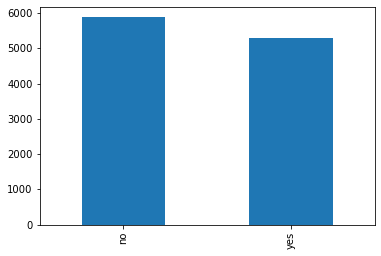

In [9]:
counts_deposit =  df['deposit'].value_counts()
counts_deposit.plot.bar("Count of Deposit")
# We don't balancing the data as the positive and negative outcomes are almost equal

<AxesSubplot:>

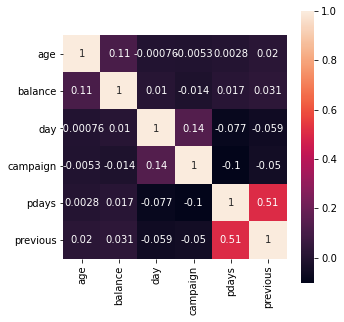

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),square=True,annot=True)

# It can be observed that there is almost no-correlation between independent variables except for pday and previous

### Distribution of continuous variables

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>]], dtype=object)

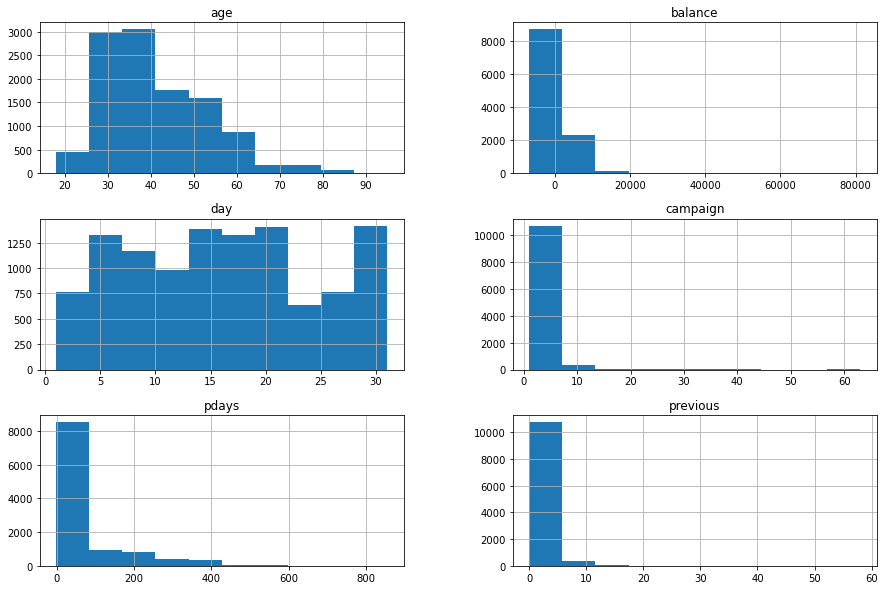

In [11]:
# Looking at histograms of continuous variable to judge the variation
df.hist(figsize=(15,10))

## Feature Engineering

### Categorical Variables

#### Job

<AxesSubplot:xlabel='job', ylabel='count'>

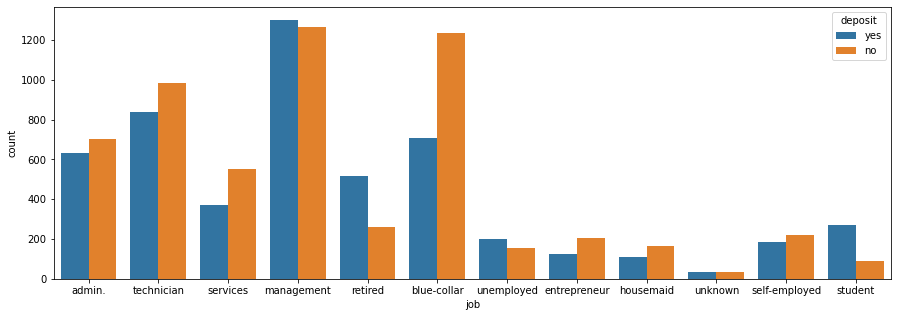

In [12]:
# Variation wrt to job
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x="job", data=df, hue='deposit', ax=ax)
# People with blue collar job are most likely to say 'no'. Management,retired and students are more likely to say 'yes'.

#### Marital Status

<AxesSubplot:xlabel='marital', ylabel='count'>

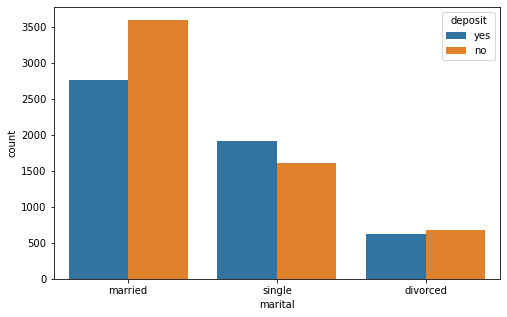

In [13]:
# Variation wrt to marital status
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x="marital", data=df, hue='deposit', ax=ax)
# Married people are less likely to buy term deposit than single people

#### Default

<AxesSubplot:xlabel='default', ylabel='count'>

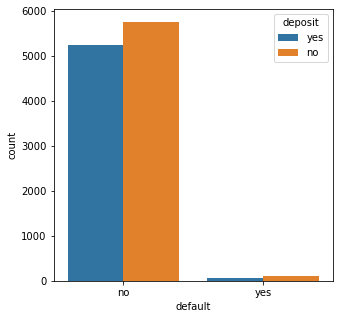

In [14]:
# Variation wrt to default
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x="default", data=df, hue='deposit', ax=ax)
# No conclusion can be found as defaults in dataset is very low

#### Education

<AxesSubplot:xlabel='education', ylabel='count'>

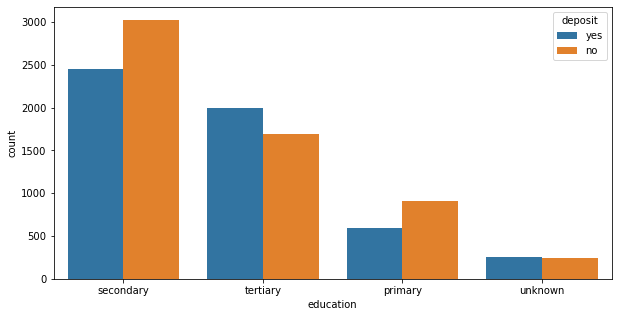

In [15]:
# Variation wrt to education
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x="education", data=df, hue='deposit', ax=ax)
# People in tertiary jobs are more likely to have higher income so more likely to buy a term deposit

#### Housing

<AxesSubplot:xlabel='housing', ylabel='count'>

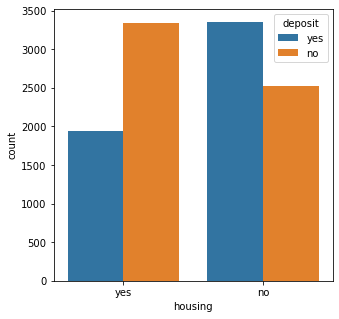

In [16]:
# Variation wrt to housing
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x="housing", data=df, hue='deposit', ax=ax)
# People having home are more likely to have home loans as a result will less likely to buy a term deposit

#### Loan

<AxesSubplot:xlabel='loan', ylabel='count'>

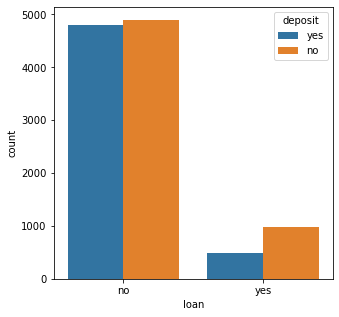

In [17]:
# Variation wrt to loan
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x="loan", data=df, hue='deposit', ax=ax)

# People with loan will most likely to say no to deposits as if they have disposable income they are more likely to repay 
# their loan instead of buying a term deposit. This is consistent with previous finding of housing

#### Contact Type

<AxesSubplot:xlabel='contact', ylabel='count'>

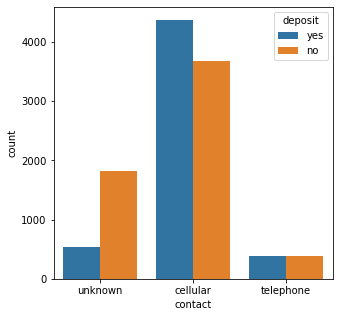

In [18]:
# Variation wrt to contact type
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x="contact", data=df, hue='deposit', ax=ax)

# It seems that cellular contact is better form of advertising

#### Month

<AxesSubplot:xlabel='month', ylabel='count'>

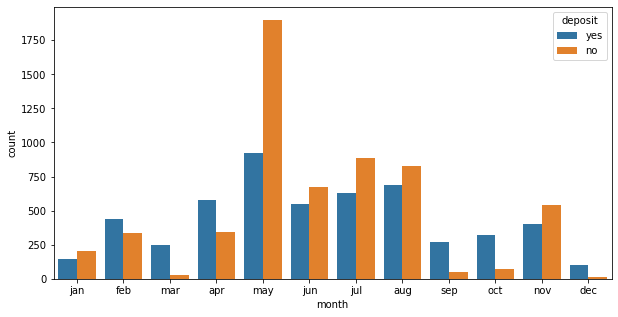

In [19]:
# Variation wrt to month
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x="month", data=df, hue='deposit',order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"), ax=ax)

# It seems there is some seasonality.

<AxesSubplot:xlabel='month_bin', ylabel='count'>

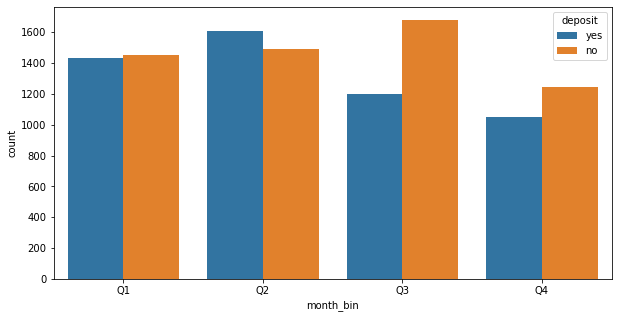

In [20]:
# Variation wrt to month
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
df["month_bin"]=pd.cut(df.day,bins=4,labels=["Q1","Q2","Q3","Q4"])
sns.countplot(x="month_bin",hue="deposit",data=df,)

# It seems that Q2 being more favorable than Q3 and Q4 with Q1 being neutral. It is still inconclusive as no trend is observed.
# It could be that May month which seems like an outlier due to huge of number of call in the month

#### Day

<AxesSubplot:xlabel='day', ylabel='count'>

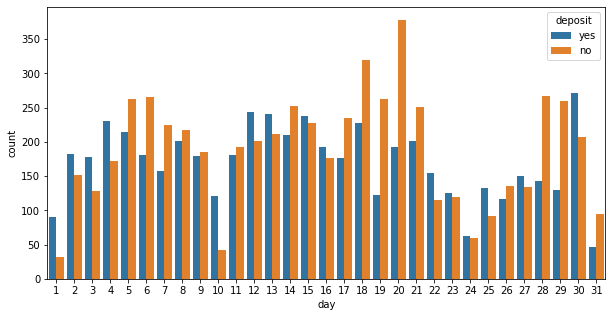

In [21]:
# We take day as categorical variable as there can be atmost 31 categories
# Variation wrt to day
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="day",hue="deposit",data=df)

<AxesSubplot:xlabel='day_bin', ylabel='count'>

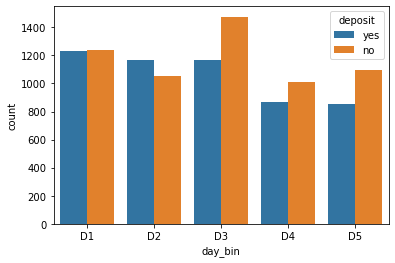

In [22]:
df["day_bin"]=pd.cut(df.day,bins=5,labels=["D1","D2","D3","D4","D5"])
sns.countplot(x="day_bin",hue="deposit",data=df,)

# It seems that earlier days of month there is greater chance of conversion than in latter days.

#### Previous Outcome

<AxesSubplot:xlabel='poutcome', ylabel='count'>

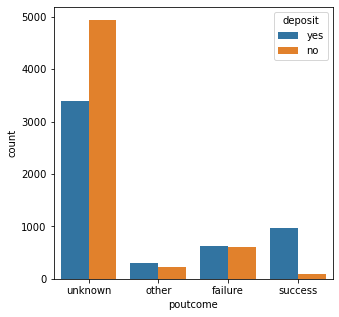

In [23]:
# Variation wrt to previous outcome
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x="poutcome", data=df, hue='deposit', ax=ax)

# It can be observed that if previous outcome was a success then there is a better chance of selling a term deposit

### Continuous Variable

#### Age

In [24]:
df['age'].describe()

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

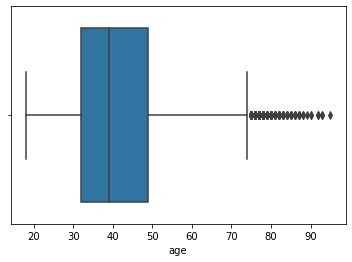

In [25]:
sns.boxplot(data=df,x='age')

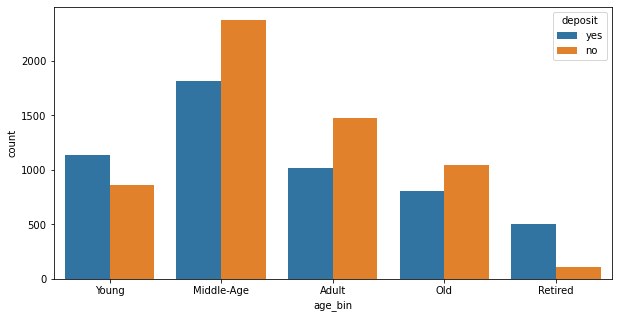

In [26]:
# Variation wrt to age
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)

df["age_bin"]=pd.cut(df.age,bins=[18,30,40,50,60,95],labels=['Young','Middle-Age','Adult',"Old",'Retired'])
sns.countplot(x="age_bin",data=df,hue="deposit",ax=ax)
plt.show()
# People with age within 18-30 and above 60 should be target. This is consistent with our previous finding that we should target
# students and retired. 

#### Balance

In [27]:
df['balance'].describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

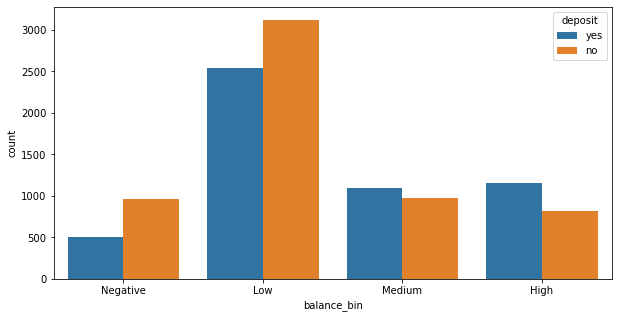

In [28]:
# Variation wrt to deposit
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)

df["balance_bin"]=pd.cut(df.balance,bins=[-7000,0,1000,2500,90000],labels=['Negative','Low','Medium',"High"])
sns.countplot(x="balance_bin",data=df,hue="deposit",ax=ax)
plt.show()
# People with balance greater than 2500 should be targetted with higher the balance better the chances

<AxesSubplot:xlabel='balance'>

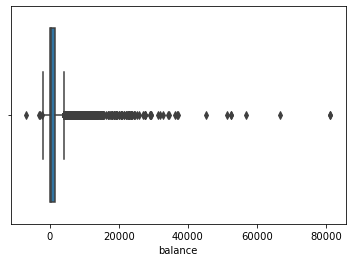

In [29]:
sns.boxplot(data=df,x='balance')

#### Campaign

In [30]:
df['campaign'].describe()

count    11162.000000
mean         2.508421
std          2.722077
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

<AxesSubplot:>

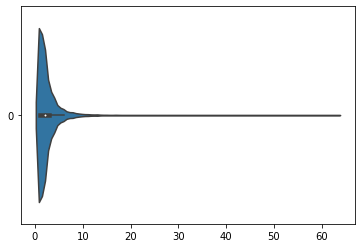

In [31]:
sns.violinplot(data=df['campaign'],orient='horizontal')
# It is highly concentrated around 1. So, we can infer that usually a customer is contacted once in the campaign.

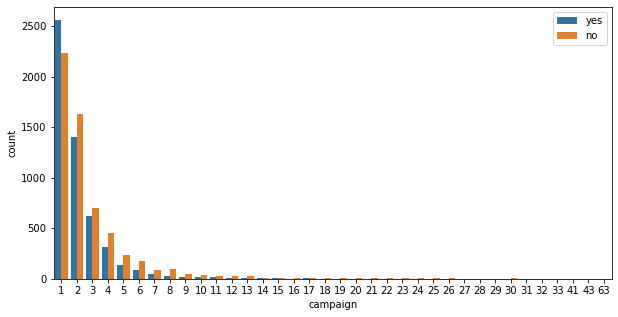

In [32]:
# Variation wrt to campaign
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x="campaign",hue="deposit",data=df,ax=ax,)
plt.legend(loc='upper right')
# It can observed that as calls increase there is a decrease in conversion. 

#### Pdays

<AxesSubplot:>

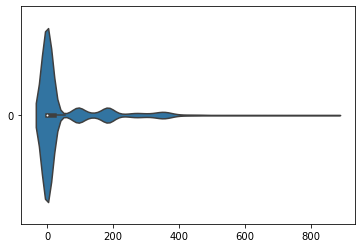

In [33]:
sns.violinplot(data=df['pdays'],orient='horizontal')

In [34]:
df['pdays'].describe()

# -1 signifies that missing data. It can be interpreted as the customer was not contacted in previous campaigns

count    11162.000000
mean        51.330407
std        108.758282
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         20.750000
max        854.000000
Name: pdays, dtype: float64

In [35]:
df[df['pdays'] ==-1]['deposit'].value_counts()

no     4940
yes    3384
Name: deposit, dtype: int64

In [36]:
df[df['pdays'] !=-1]['deposit'].value_counts()

# It seems like if customer was contacted in previous campaign then there is greater chance of conversion

yes    1905
no      933
Name: deposit, dtype: int64

#### Previous

In [37]:
df['previous'].describe()

count    11162.000000
mean         0.832557
std          2.292007
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         58.000000
Name: previous, dtype: float64

<AxesSubplot:>

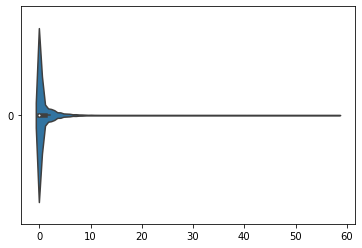

In [38]:
sns.violinplot(data=df['previous'],orient='horizontal')

In [39]:
df[df['previous'] ==0]['deposit'].value_counts()

# We are getting the same result as we got pdays. It means our initial guess that -1 represents that customer wasn't contacted
# was correct. Also the correlation values that we are getting initially can be explained.

no     4940
yes    3384
Name: deposit, dtype: int64

In [40]:
# We drop previous as Pday and Previous represent the same value
df.drop(columns=['previous'],inplace=True)

## Data Cleaning and Preparation

In [41]:
# Deleting the added columns
# Deleting month,day and default as it has no trend
#df.drop(columns=['month_bin','age_bin','balance_bin','month','default'],inplace=True)
mod_df = df.copy(deep=True)
mod_df.drop(columns=['age_bin','balance_bin','month','month_bin','day','day_bin','default'],inplace=True)

In [42]:
mod_df[mod_df['balance'] < -2000].count()
# Removing unecessary variables like month - Done
# Convert categorical variables - Done
# Normalize the data due to age and Balance in different magnitude - Not needed as none of models are sensitive to magnitude
# Do K fold sampling
# Do test train split

age          5
job          5
marital      5
education    5
balance      5
housing      5
loan         5
contact      5
campaign     5
pdays        5
poutcome     5
deposit      5
dtype: int64

In [43]:
mod_df['poutcome'] = mod_df['poutcome'].replace(['unknown'],'other')
mod_df['poutcome'].value_counts()

other      8863
failure    1228
success    1071
Name: poutcome, dtype: int64

### Convert categorical variables

#### Converting Binary variables

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
mod_df['deposit'] = label_encoder.fit_transform(mod_df['deposit'])
mod_df['housing'] = label_encoder.fit_transform(mod_df['housing'])
mod_df['loan'] = label_encoder.fit_transform(mod_df['loan'])
mod_df

,age,job,marital,education,balance,housing,loan,contact,campaign,pdays,poutcome,deposit
0,59,admin.,married,secondary,2343,1,0,unknown,1,-1,other,1
1,56,admin.,married,secondary,45,0,0,unknown,1,-1,other,1
2,41,technician,married,secondary,1270,1,0,unknown,1,-1,other,1
3,55,services,married,secondary,2476,1,0,unknown,1,-1,other,1
4,54,admin.,married,tertiary,184,0,0,unknown,2,-1,other,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,1,0,cellular,1,-1,other,0
11158,39,services,married,secondary,733,0,0,unknown,4,-1,other,0
11159,32,technician,single,secondary,29,0,0,cellular,2,-1,other,0
11160,43,technician,married,secondary,0,0,1,cellular,2,172,failure,0


#### Converting Multinomial variables

In [45]:
mod_df = pd.get_dummies(data=mod_df,columns=['job','marital', 'education', 'contact' ,'poutcome'])


In [46]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   housing              11162 non-null  int32
 3   loan                 11162 non-null  int32
 4   campaign             11162 non-null  int64
 5   pdays                11162 non-null  int64
 6   deposit              11162 non-null  int32
 7   job_admin.           11162 non-null  uint8
 8   job_blue-collar      11162 non-null  uint8
 9   job_entrepreneur     11162 non-null  uint8
 10  job_housemaid        11162 non-null  uint8
 11  job_management       11162 non-null  uint8
 12  job_retired          11162 non-null  uint8
 13  job_self-employed    11162 non-null  uint8
 14  job_services         11162 non-null  uint8
 15  job_student          11162 non-null  uint8
 16  job_technician       1

In [47]:
mod_df

,age,balance,housing,loan,campaign,pdays,deposit,job_admin.,job_blue-collar,job_entrepreneur,...,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success
0,59,2343,1,0,1,-1,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
1,56,45,0,0,1,-1,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,41,1270,1,0,1,-1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,55,2476,1,0,1,-1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,54,184,0,0,2,-1,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,1,0,1,-1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
11158,39,733,0,0,4,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
11159,32,29,0,0,2,-1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
11160,43,0,0,1,2,172,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


### Standardizing the data 

In [48]:
# cols = ['age','balance']
# for i in cols:
#     Q1 = mod_df[i].quantile(0.25)
#     Q3 = mod_df[i].quantile(0.75)
#     IQR = Q3 - Q1
#     low = Q1 - 1.5*IQR
#     high = Q3 + 1.5*IQR
#     mod_df = mod_df[~((mod_df[i] < low) | (mod_df[i] >high))]

# mod_df.count()

In [49]:
# from sklearn.preprocessing import StandardScaler
# num_cols = ['age','balance','campaign','pdays','previous']
# standard_scaler= StandardScaler()
# for i in num_cols:
#     standard_scaler = StandardScaler().fit(mod_df[[i]])
#     mod_df[i] = standard_scaler.fit_transform(mod_df[[i]])

# mod_df

## Fitting the model

In [50]:
X = mod_df.drop(columns = 'deposit')
y = mod_df['deposit']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [52]:
def important_features(importance):
    temp_dict = {}
    for i in range(0,len(importance)):
        temp_dict[X_train.columns[i]] = importance[i]
    temp_dict = dict(sorted(temp_dict.items(), key=lambda item: item[1],reverse=True))
    temp_list = list(temp_dict.keys())[0:5]
    print("Top 5 features : \n")
    for i in temp_list:
        print("{} : {} \n".format(i,temp_dict[i])) 
        
    # plot feature importance
    fig_dims = (50, 60)
    fig, ax = plt.subplots(figsize=fig_dims)
    plt.bar(X_train.columns, importance)
    plt.show()

In [53]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

cvs = {}
grid_search_dict = {}
acc_score = {}
cv = KFold(n_splits=10,random_state=10,shuffle=True)

### Logistic Classification

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
parameters = {'C':(0.001,0.01,0.1,1)}
clf = GridSearchCV(model, parameters,cv=cv)

In [55]:
clf.fit(X_train, y_train)
grid_search_dict['logistic'] = clf.best_estimator_
clf.best_params_

{'C': 1}

In [56]:
scores = cross_val_score(clf.best_estimator_, X_train, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
acc_score['logistic'] = scores
print('Accuracy:{} ({})'.format (mean(scores), std(scores)))

Accuracy:0.6751926844081744 (0.02175524790119667)


Top 5 features : 

housing : 0.029721658105363803 

poutcome_failure : 0.017871222076215543 

poutcome_other : 0.01548202126388729 

campaign : 0.015075857125791448 

poutcome_success : 0.014287420857723143 



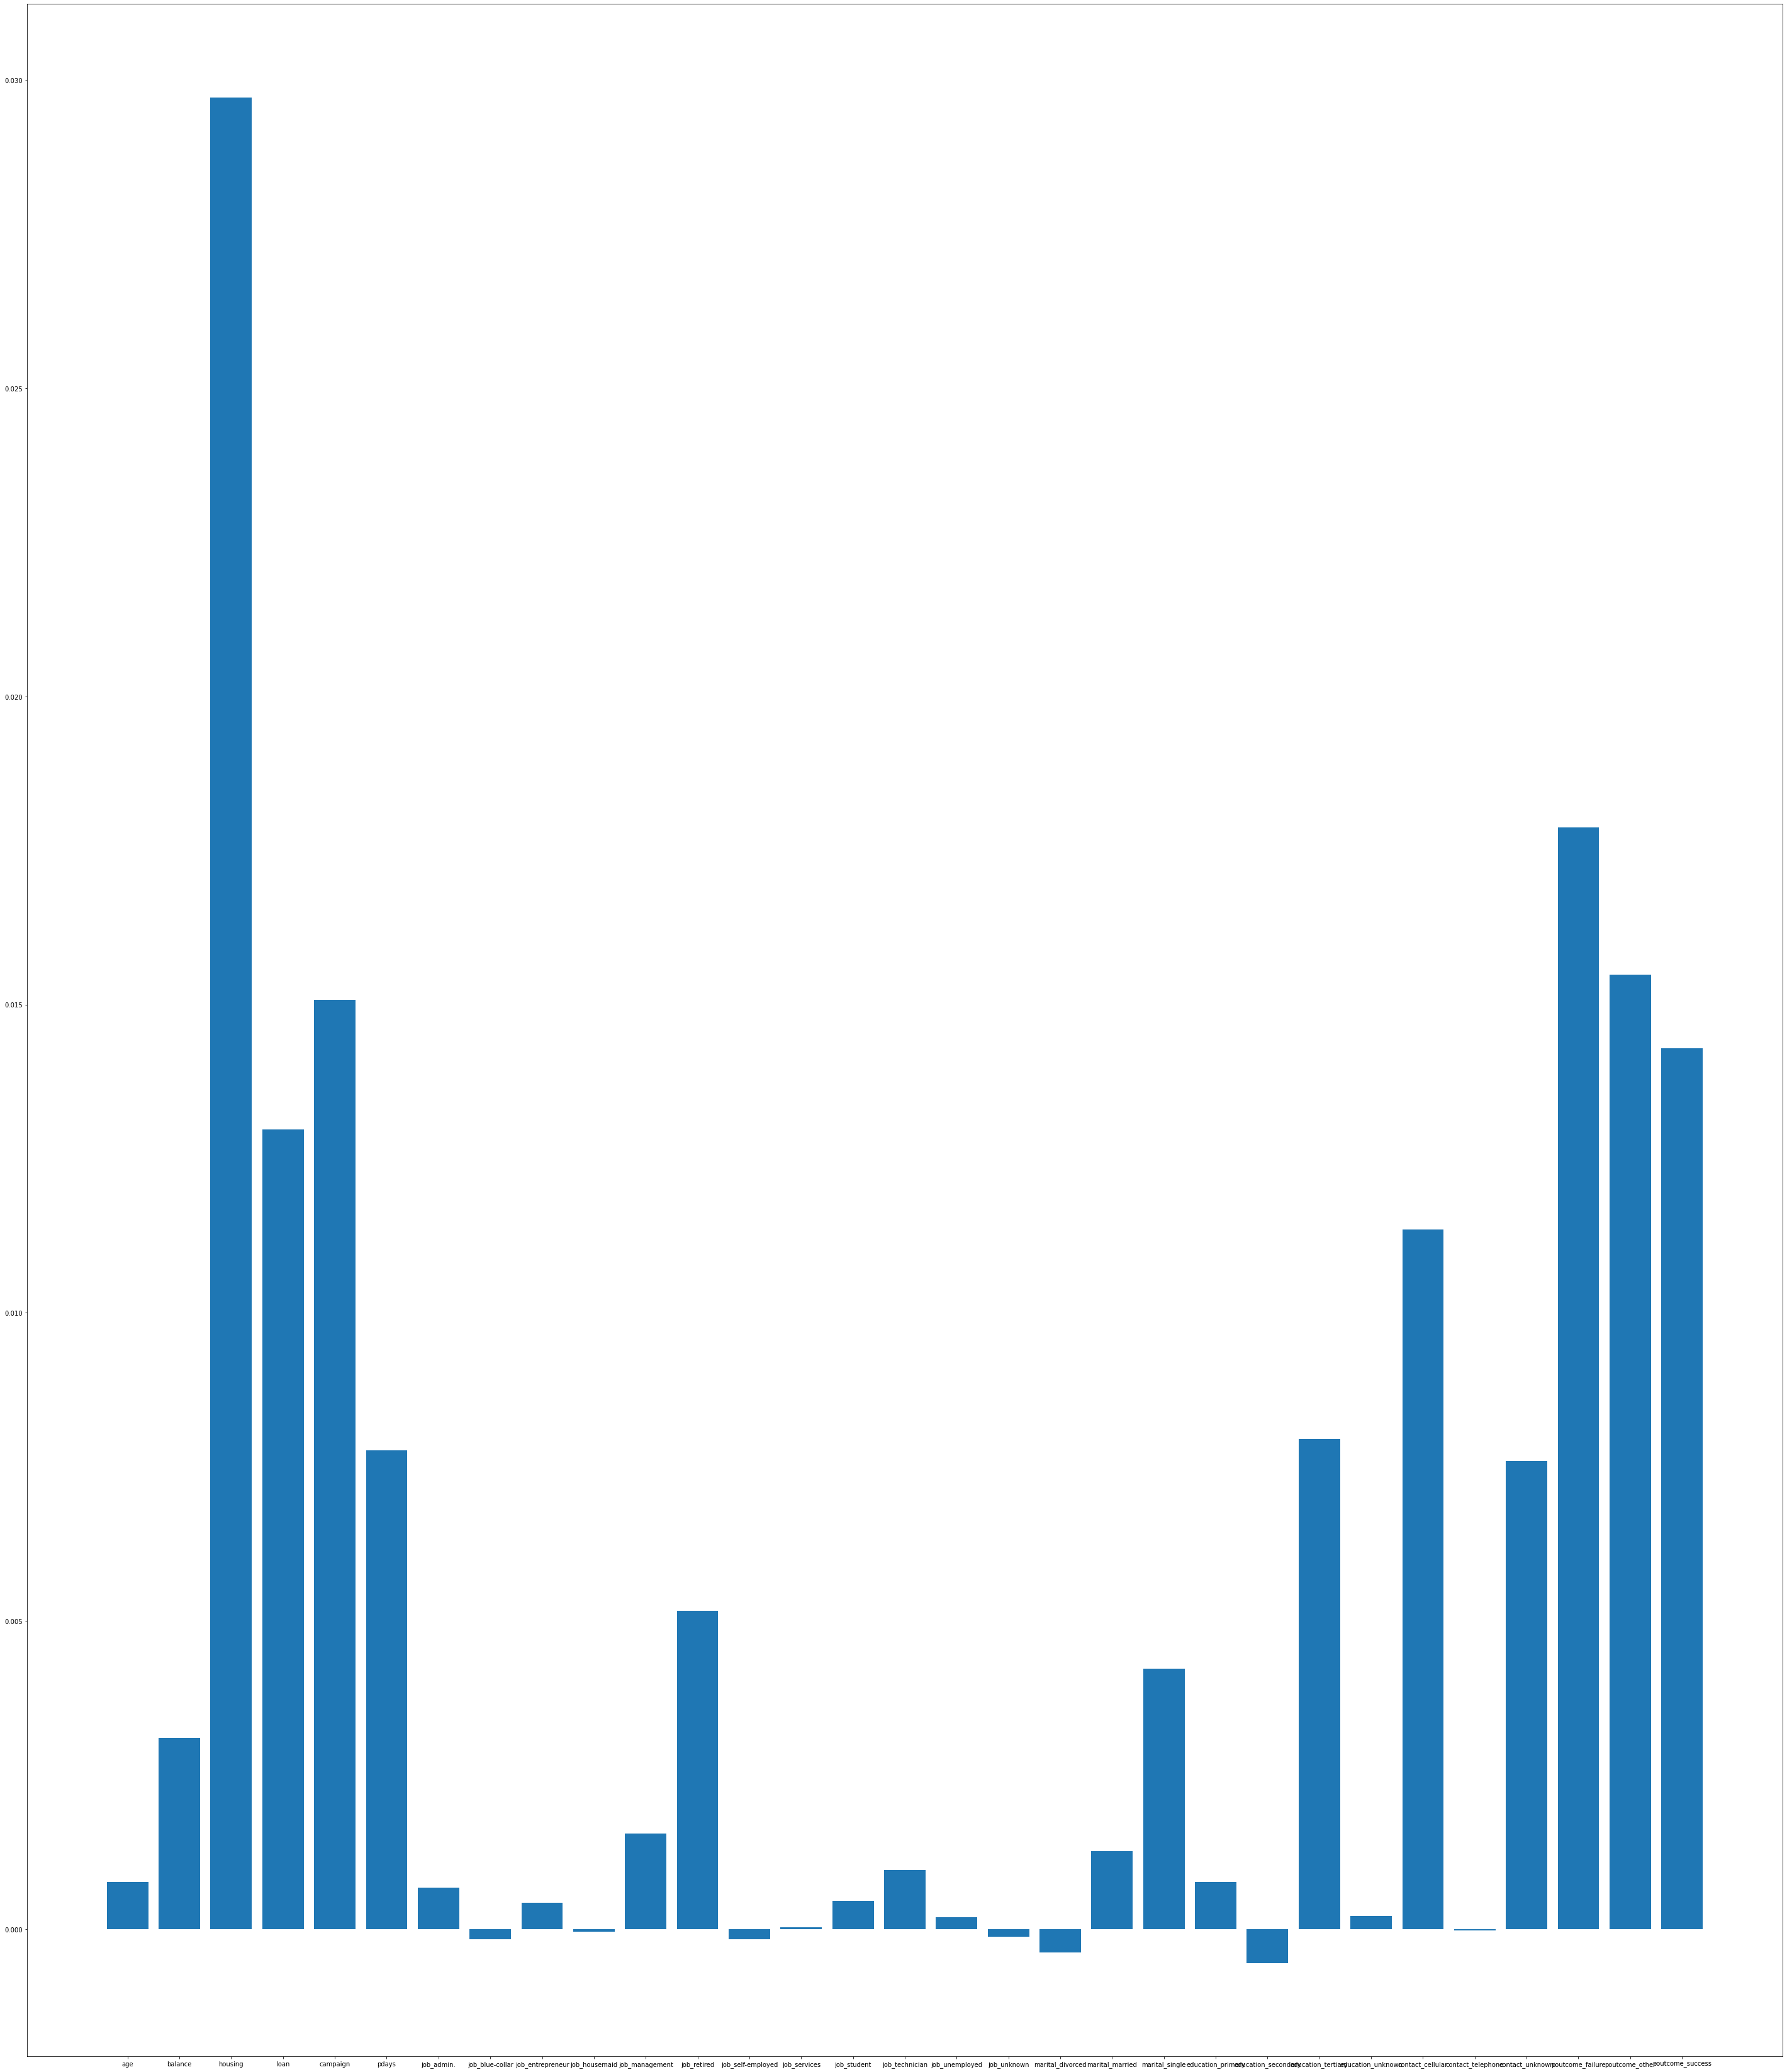

Wall time: 2.34 s


In [57]:
%%time
from sklearn.inspection import permutation_importance
model = clf.best_estimator_.fit(X_train, y_train)
results = permutation_importance(model, X_train, y_train, scoring='accuracy')
importance = results.importances_mean
important_features(importance)

### Ridge Classifier

In [58]:
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
parameters = {'alpha':(0.001,0.01,0.1,1)}
clf = GridSearchCV(model, parameters,cv=cv)

In [59]:
clf.fit(X_train, y_train)
grid_search_dict['ridge'] = clf.best_estimator_
clf.best_params_

{'alpha': 1}

In [60]:
scores = cross_val_score(clf.best_estimator_, X_train, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
acc_score['ridge'] = scores
print('Accuracy:{} ({})'.format (mean(scores), std(scores)))

Accuracy:0.6726841515470355 (0.018730973049411893)


Top 5 features : 

housing : 0.02783418946362446 

poutcome_failure : 0.015362561223270888 

poutcome_other : 0.014621908971449105 

poutcome_success : 0.011922112053518142 

campaign : 0.010990323736710116 



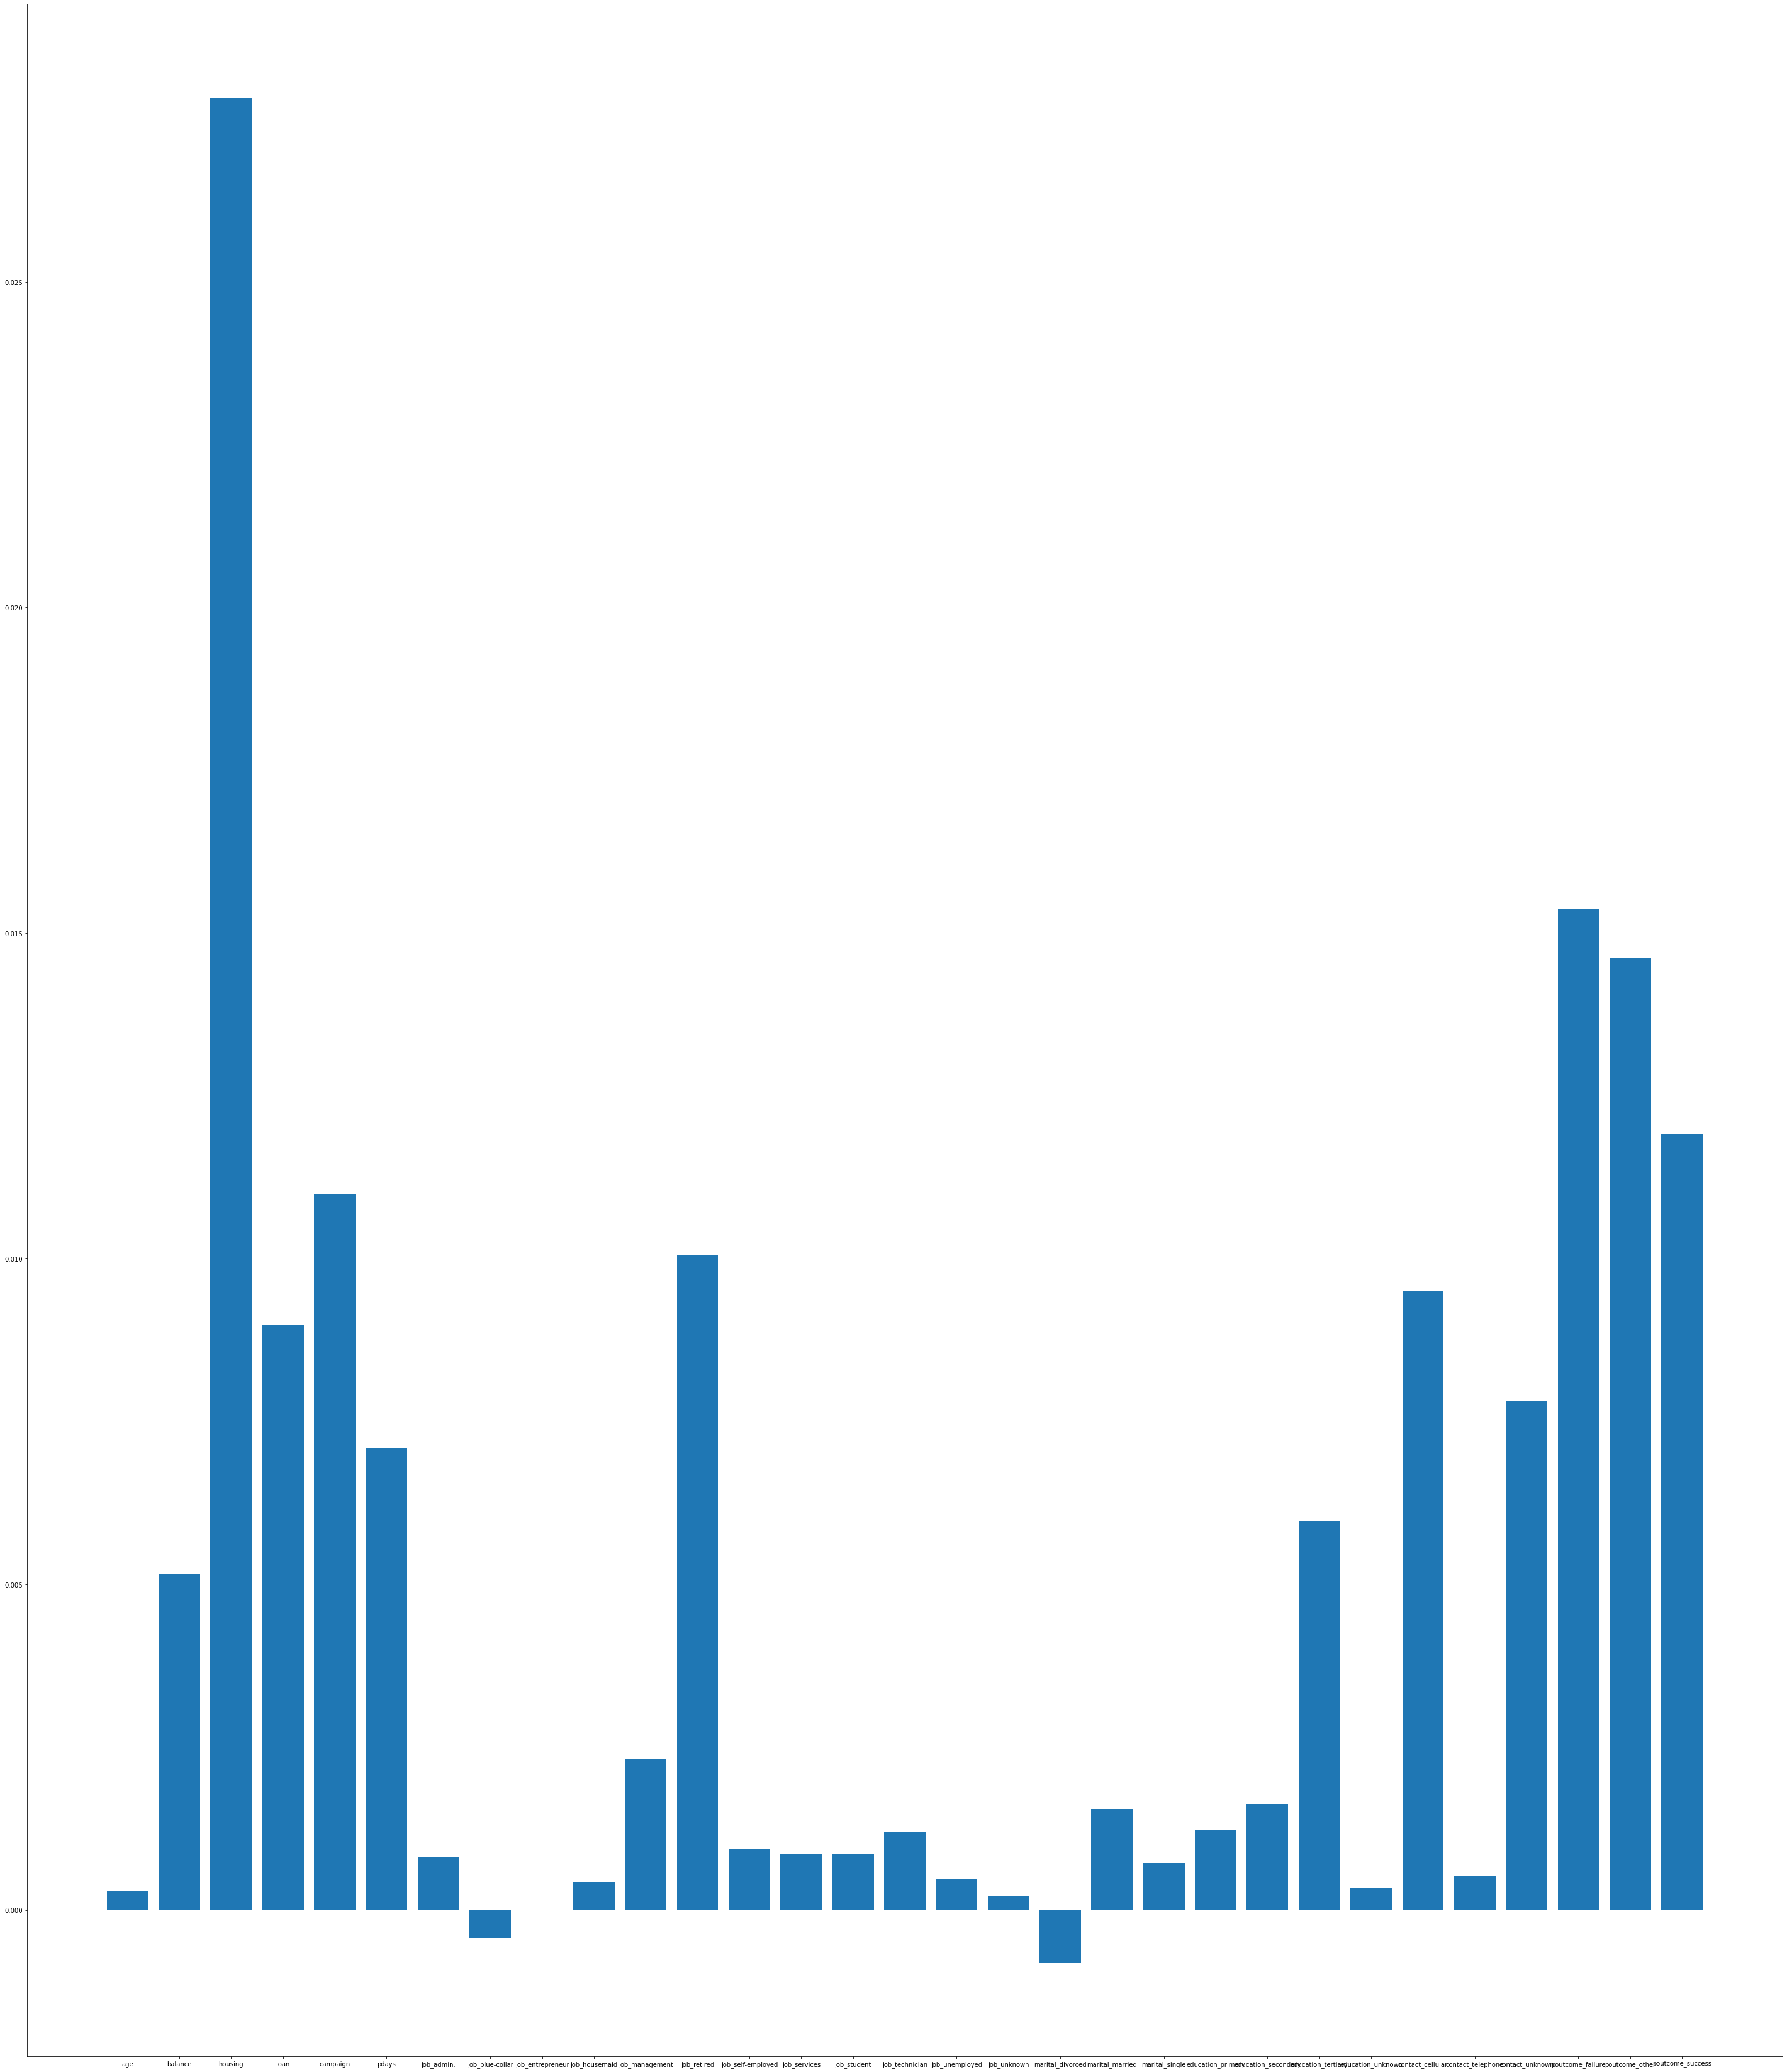

Wall time: 1.73 s


In [61]:
%%time
from sklearn.inspection import permutation_importance
model = clf.best_estimator_.fit(X_train, y_train)
results = permutation_importance(model, X_train, y_train, scoring='accuracy')
importance = results.importances_mean
important_features(importance)

### SVM

In [62]:
# Using LinearSVC for speed
from sklearn.svm import LinearSVC
model = LinearSVC(dual=False) # Dual is preferred false if n_samples > n_features
parameters = {'C':(0.001,0.01,0.1,1)}
clf = GridSearchCV(model, parameters,cv=10)

In [63]:
clf.fit(X_train, y_train)
grid_search_dict['svm'] = clf.best_estimator_
clf.best_params_

{'C': 0.1}

In [64]:
scores = cross_val_score(clf.best_estimator_, X_train, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
acc_score['svm'] = scores
print('Accuracy:{} ({})'.format (mean(scores), std(scores)))

Accuracy:0.6734009974251717 (0.019551131462897345)


Top 5 features : 

housing : 0.02790586548799425 

poutcome_success : 0.015147533150161286 

poutcome_failure : 0.012806116354079555 

campaign : 0.012376060207860484 

poutcome_other : 0.011444271891052437 



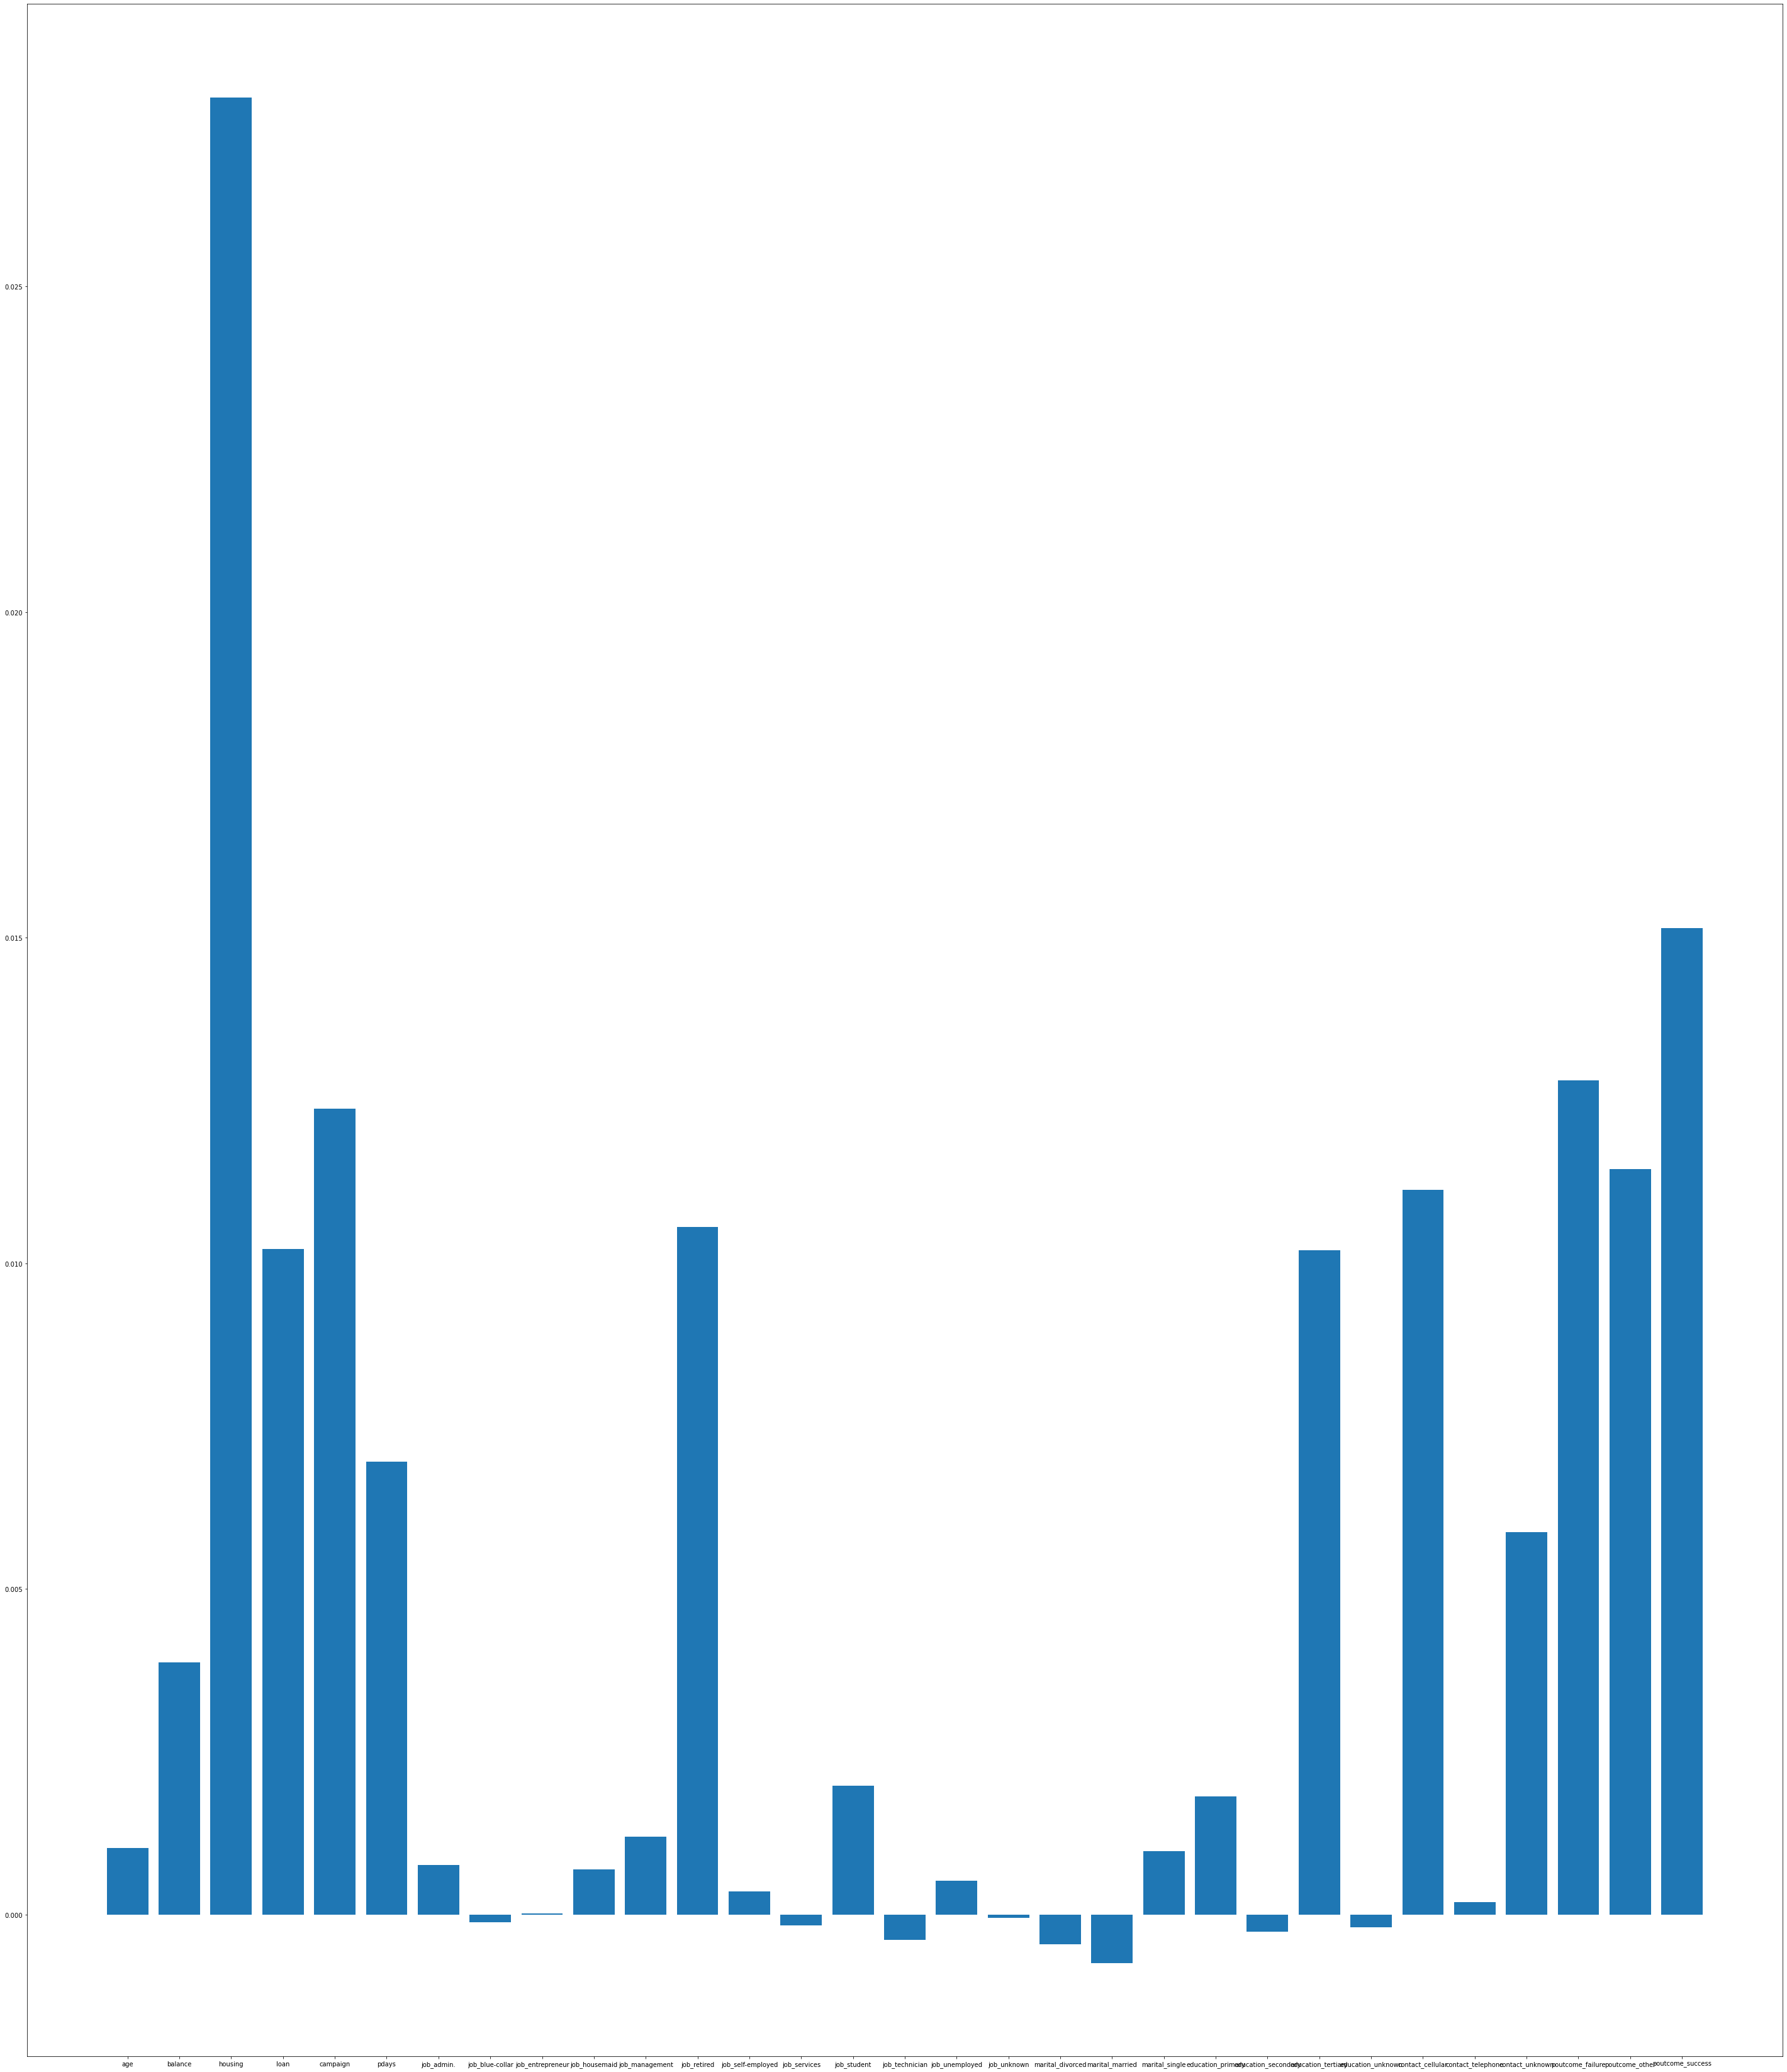

Wall time: 1.88 s


In [65]:
%%time
from sklearn.inspection import permutation_importance
model = clf.best_estimator_.fit(X_train, y_train)
results = permutation_importance(model, X_train, y_train, scoring='accuracy')
importance = results.importances_mean
important_features(importance)

### Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
parameters = {'criterion' : ('gini', 'entropy'),'min_samples_split' : range(2,10)}
clf = GridSearchCV(model, parameters,cv=10)

In [67]:
clf.fit(X_train, y_train)
grid_search_dict['decision_tree'] = clf.best_estimator_
clf.best_params_

{'criterion': 'entropy', 'min_samples_split': 9}

In [68]:
scores = cross_val_score(clf.best_estimator_, X_train, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
acc_score['decision_tree'] = scores
print('Accuracy:{} ({})'.format (mean(scores), std(scores)))

Accuracy:0.6115165824073361 (0.015074416136220466)


Top 5 features : 

balance : 0.23641142037988297 

age : 0.18903356827141327 

campaign : 0.14586070959264133 

housing : 0.13496595388842436 

pdays : 0.10682116831919726 



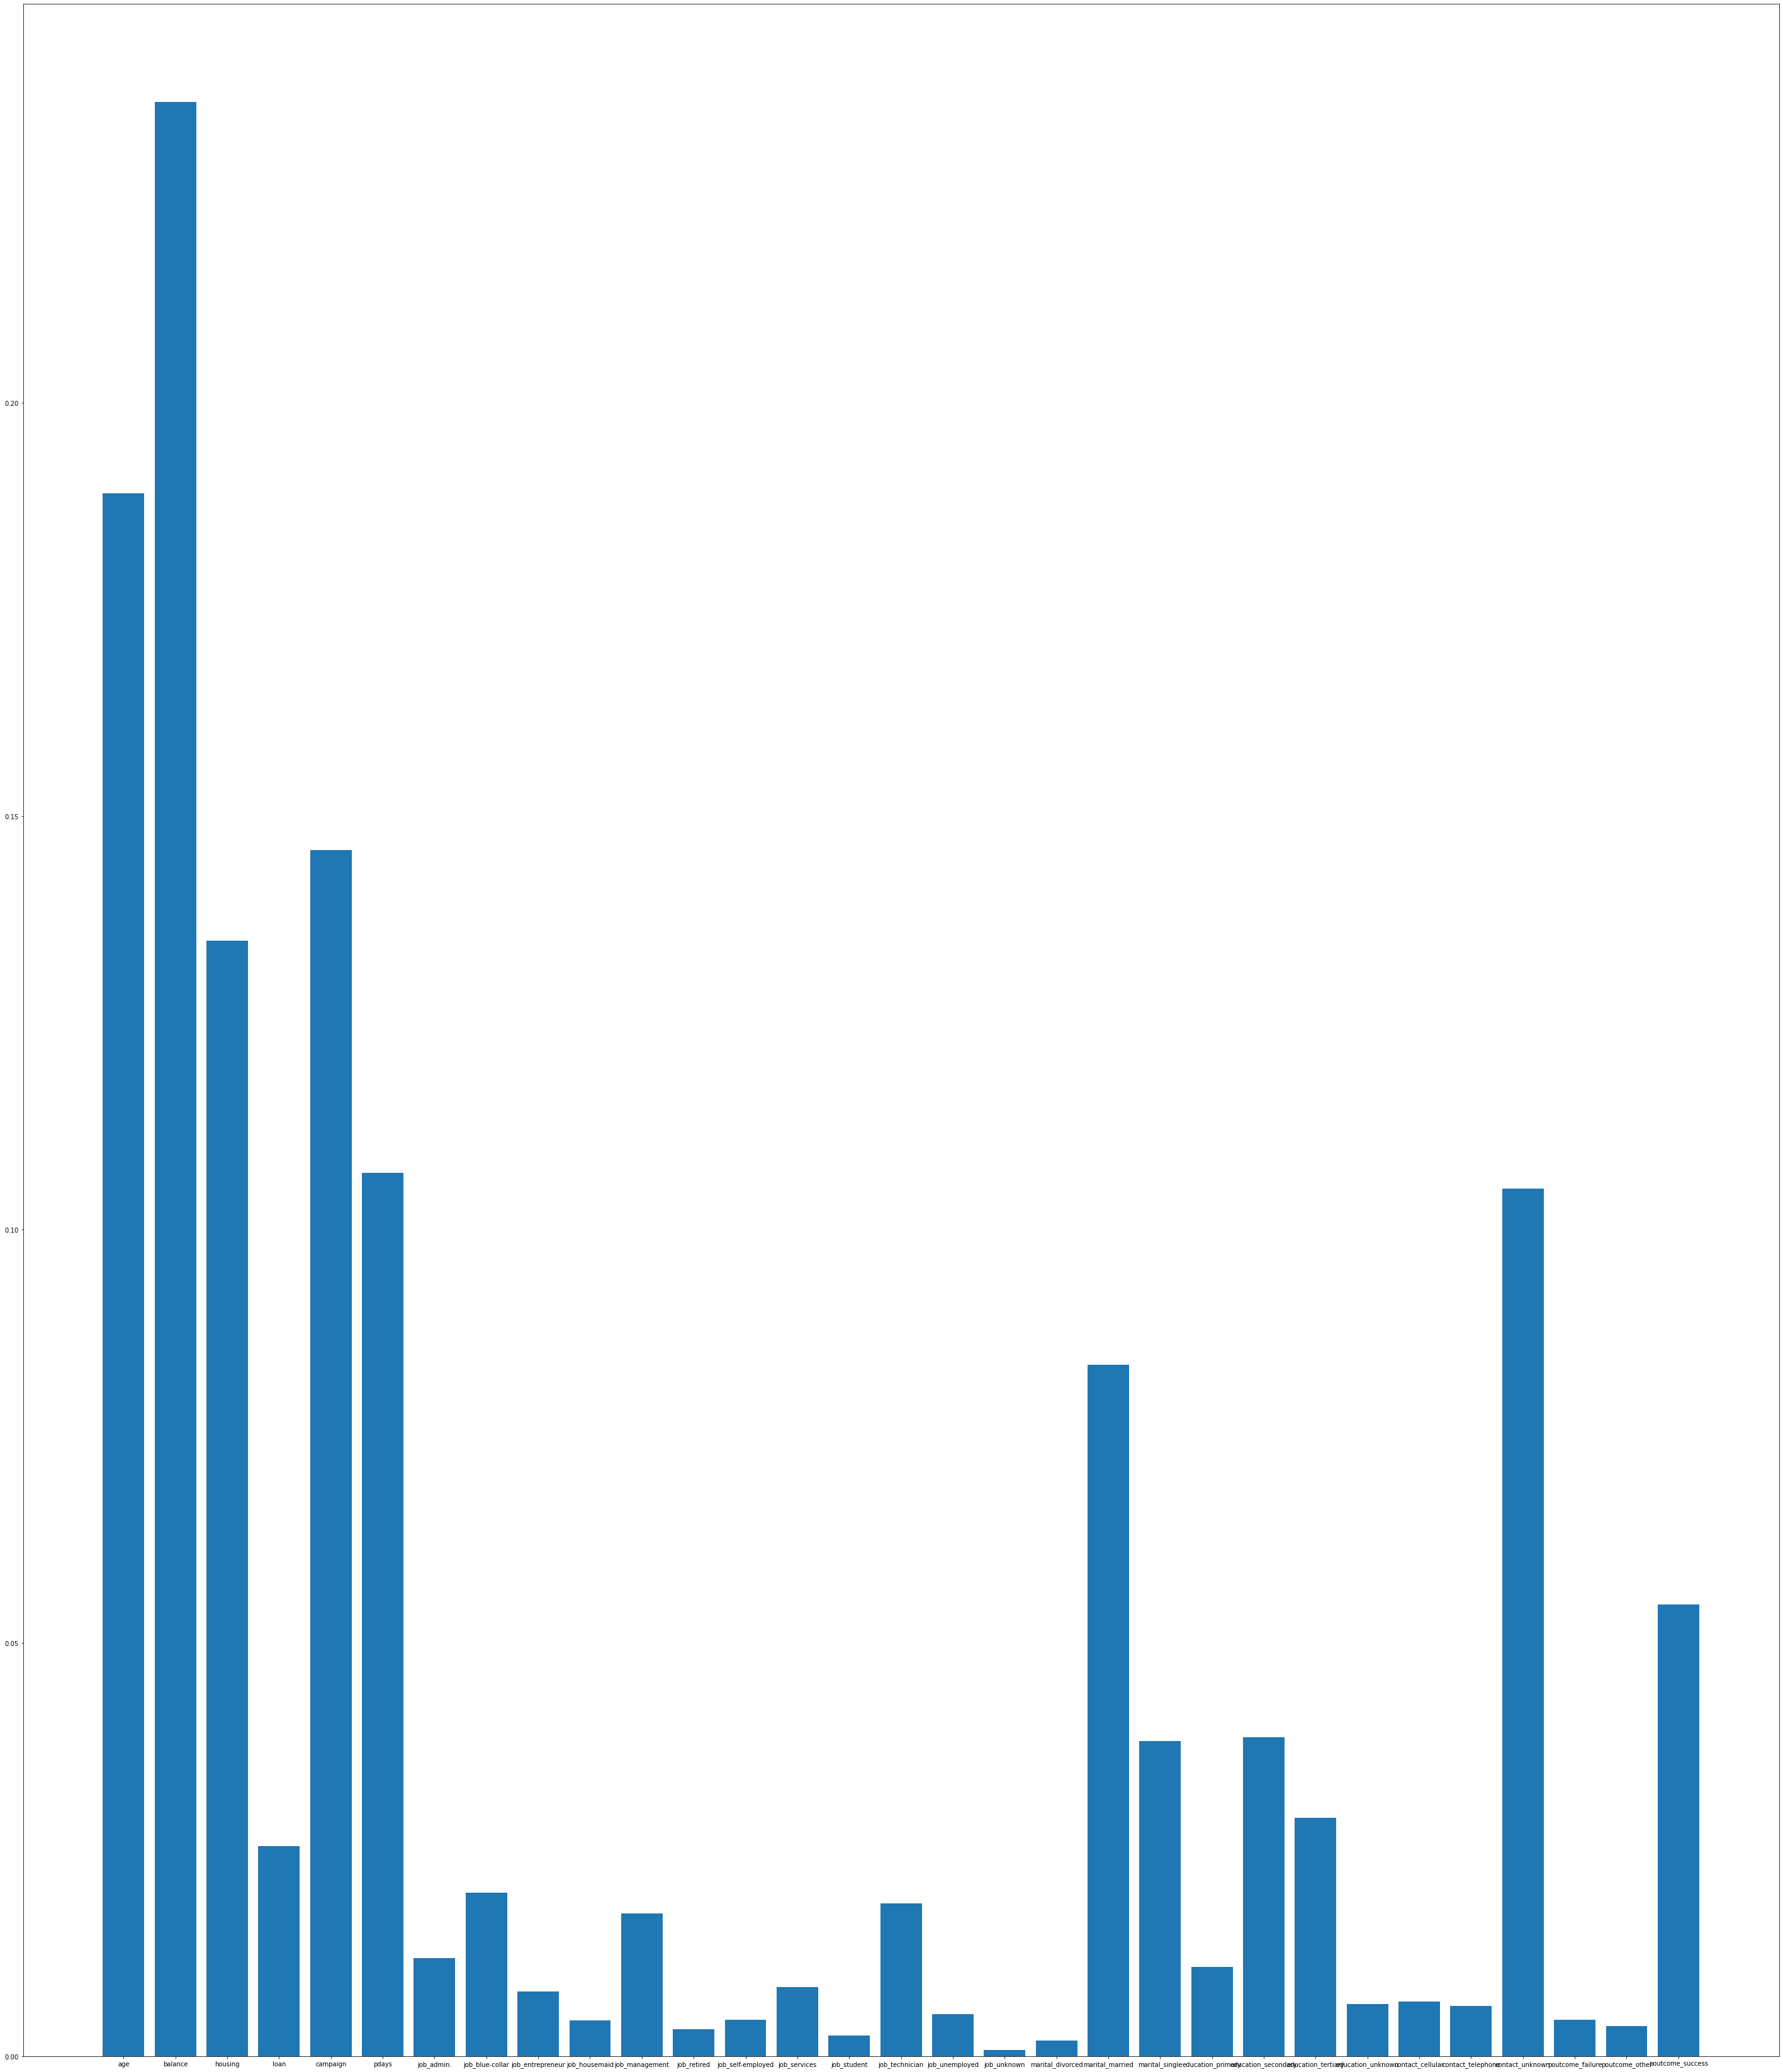

Wall time: 1.57 s


In [69]:
%%time
from sklearn.inspection import permutation_importance
model = clf.best_estimator_.fit(X_train, y_train)
results = permutation_importance(model, X_train, y_train, scoring='accuracy')
importance = results.importances_mean
important_features(importance)

### KNN Classifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
parameters = {'n_neighbors' : range(1,20)}
clf = GridSearchCV(model, parameters,cv=10)

In [71]:
clf.fit(X_train, y_train)
grid_search_dict['knn'] = clf.best_estimator_
clf.best_params_

{'n_neighbors': 19}

In [72]:
scores = cross_val_score(clf.best_estimator_, X_train, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
acc_score['knn'] = scores
print('Accuracy:{} ({})'.format (mean(scores), std(scores)))

Accuracy:0.6064989464019412 (0.010432516719285505)


Top 5 features : 

pdays : 0.07831800262812091 

balance : 0.07363516903595749 

age : 0.030151714251582827 

campaign : 0.000979572333054568 

marital_married : 0.0007406522518217384 



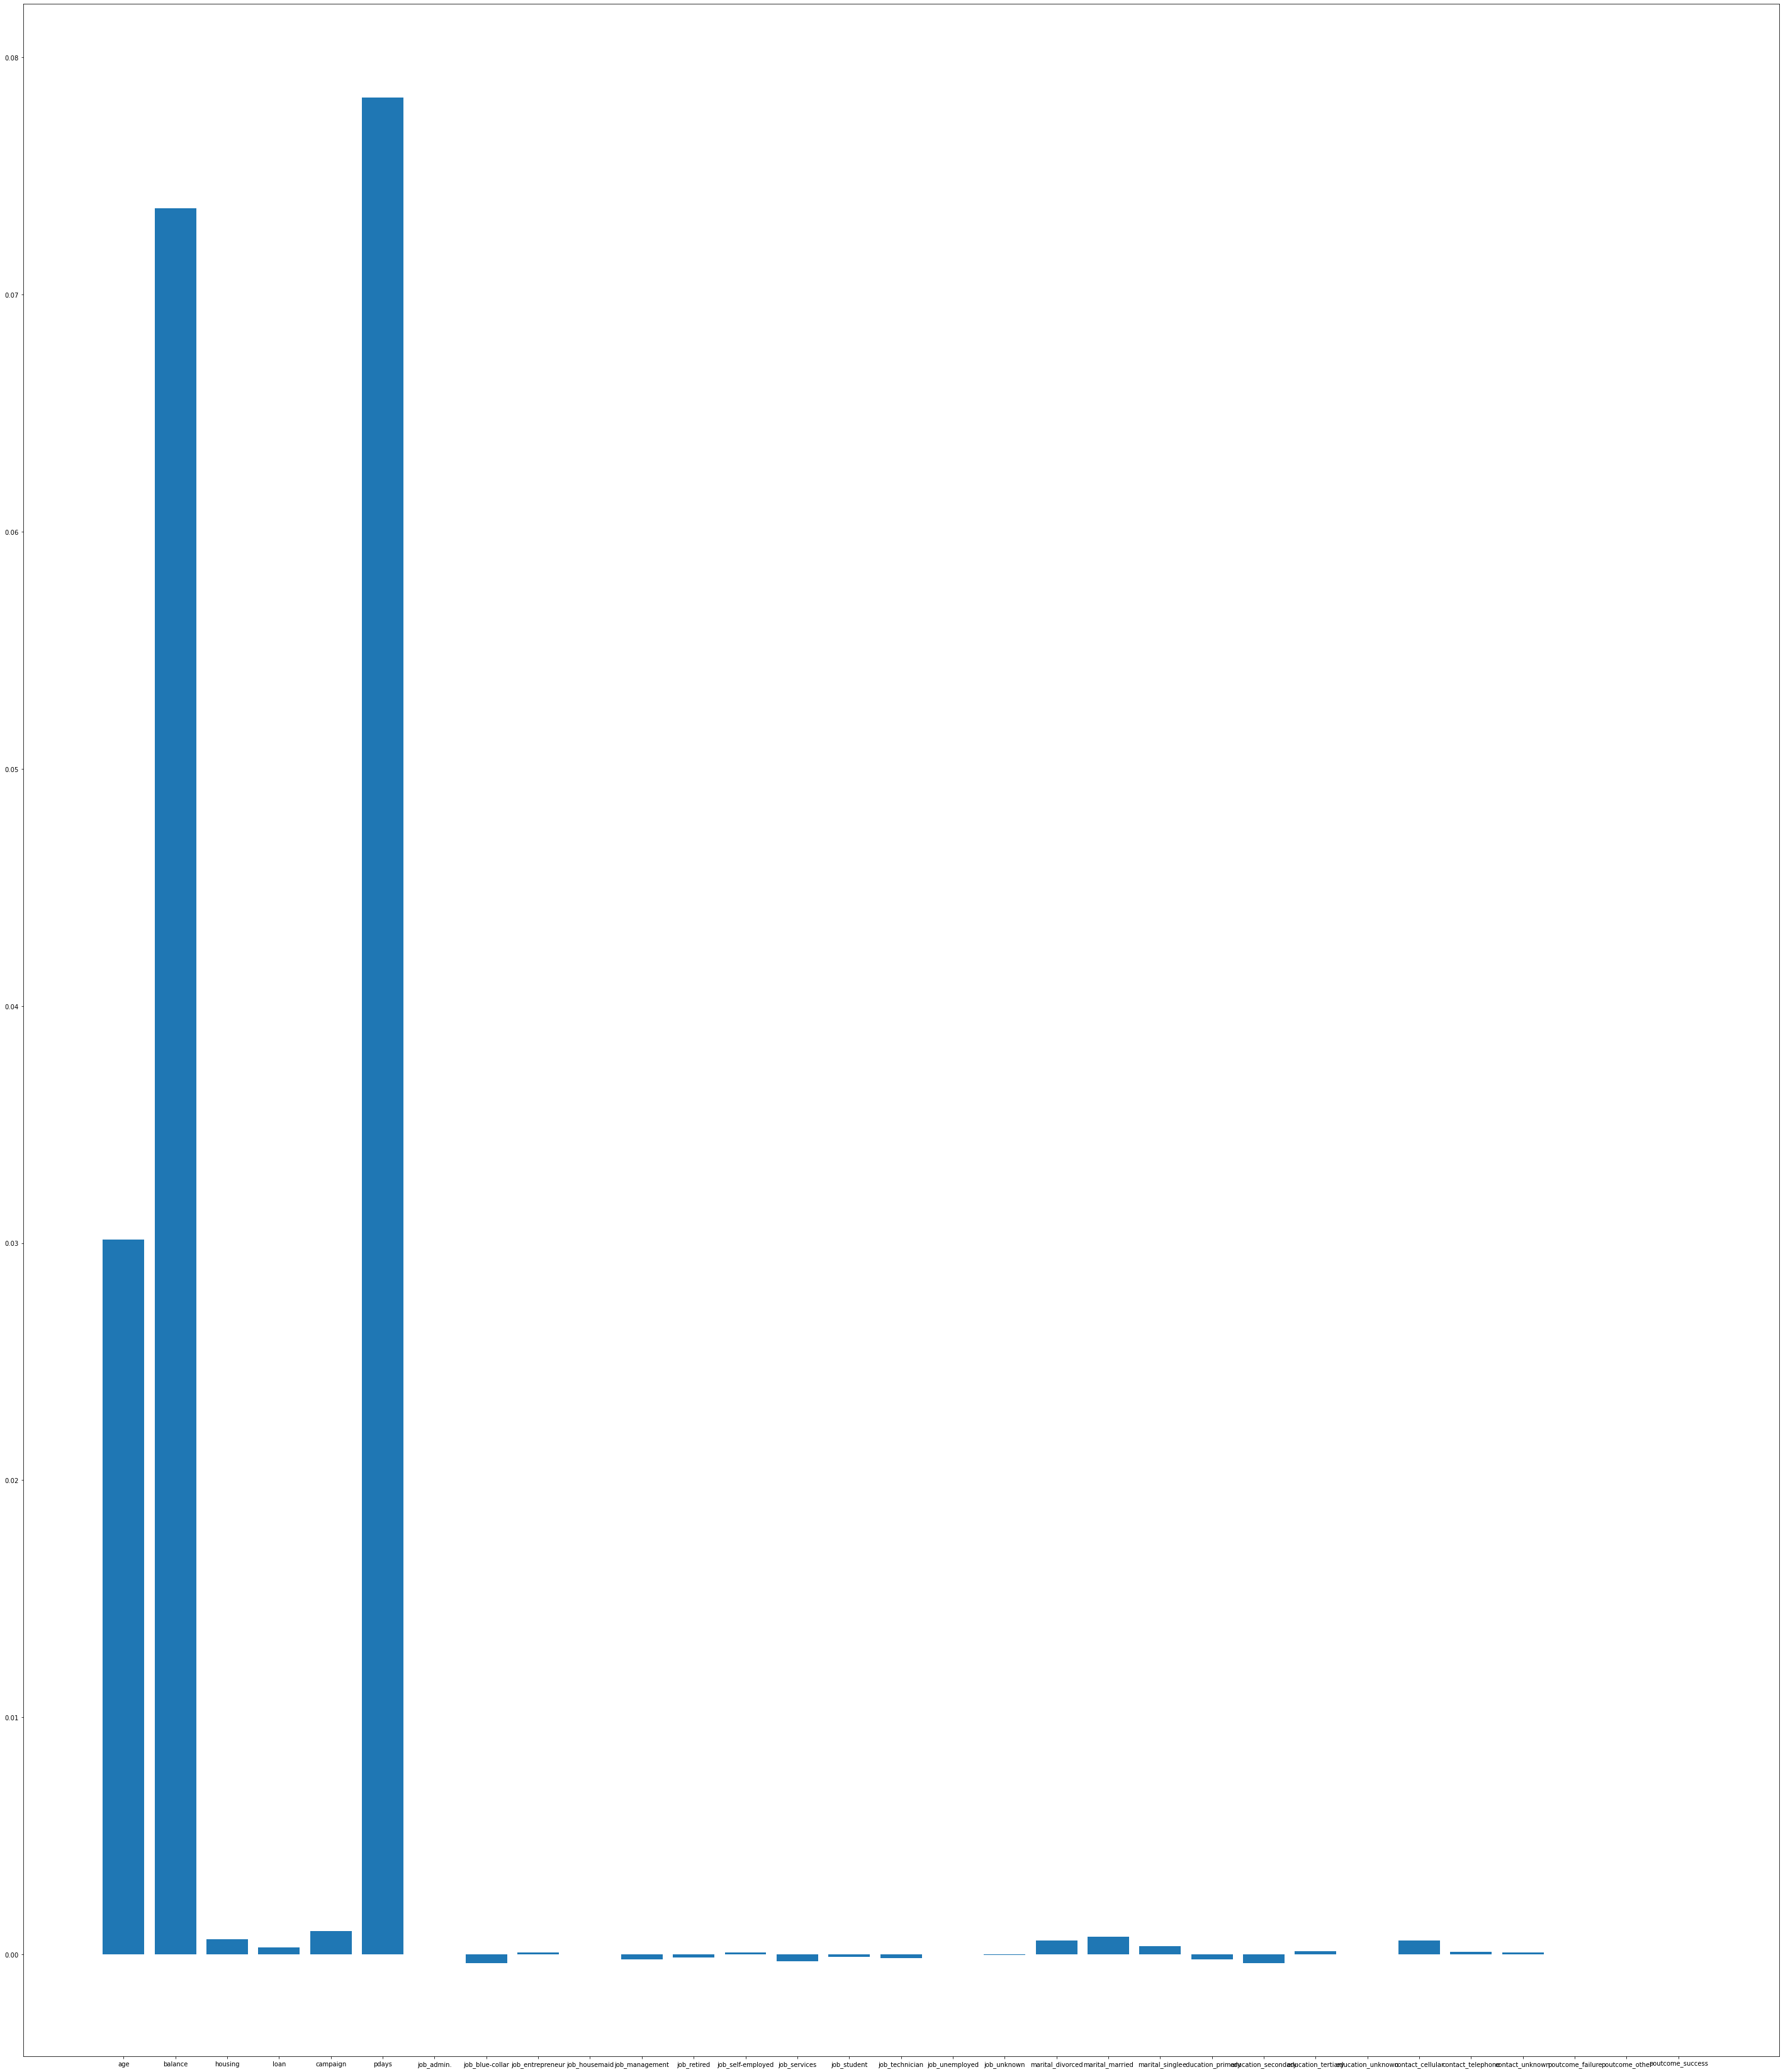

Wall time: 4min 12s


In [73]:
%%time
#NOTE - Takes a lot of time to fit
from sklearn.inspection import permutation_importance
model = clf.best_estimator_.fit(X_train, y_train)
results = permutation_importance(model, X_train, y_train, scoring='accuracy')
importance = results.importances_mean
important_features(importance)

### Naive Bayes Classifier

In [74]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
grid_search_dict['naive_bayes'] = model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
acc_score['naive_bayes'] = scores
print('Accuracy:{} ({})'.format (mean(scores), std(scores)))

Accuracy:0.6491509910094867 (0.021257196888046913)


In [75]:
model.fit(X_train, y_train)

GaussianNB()

Top 5 features : 

poutcome_success : 0.020786047067255998 

housing : 0.010512483574244414 

job_retired : 0.008218850794409293 

loan : 0.007454306534464217 

contact_unknown : 0.006522518217656215 



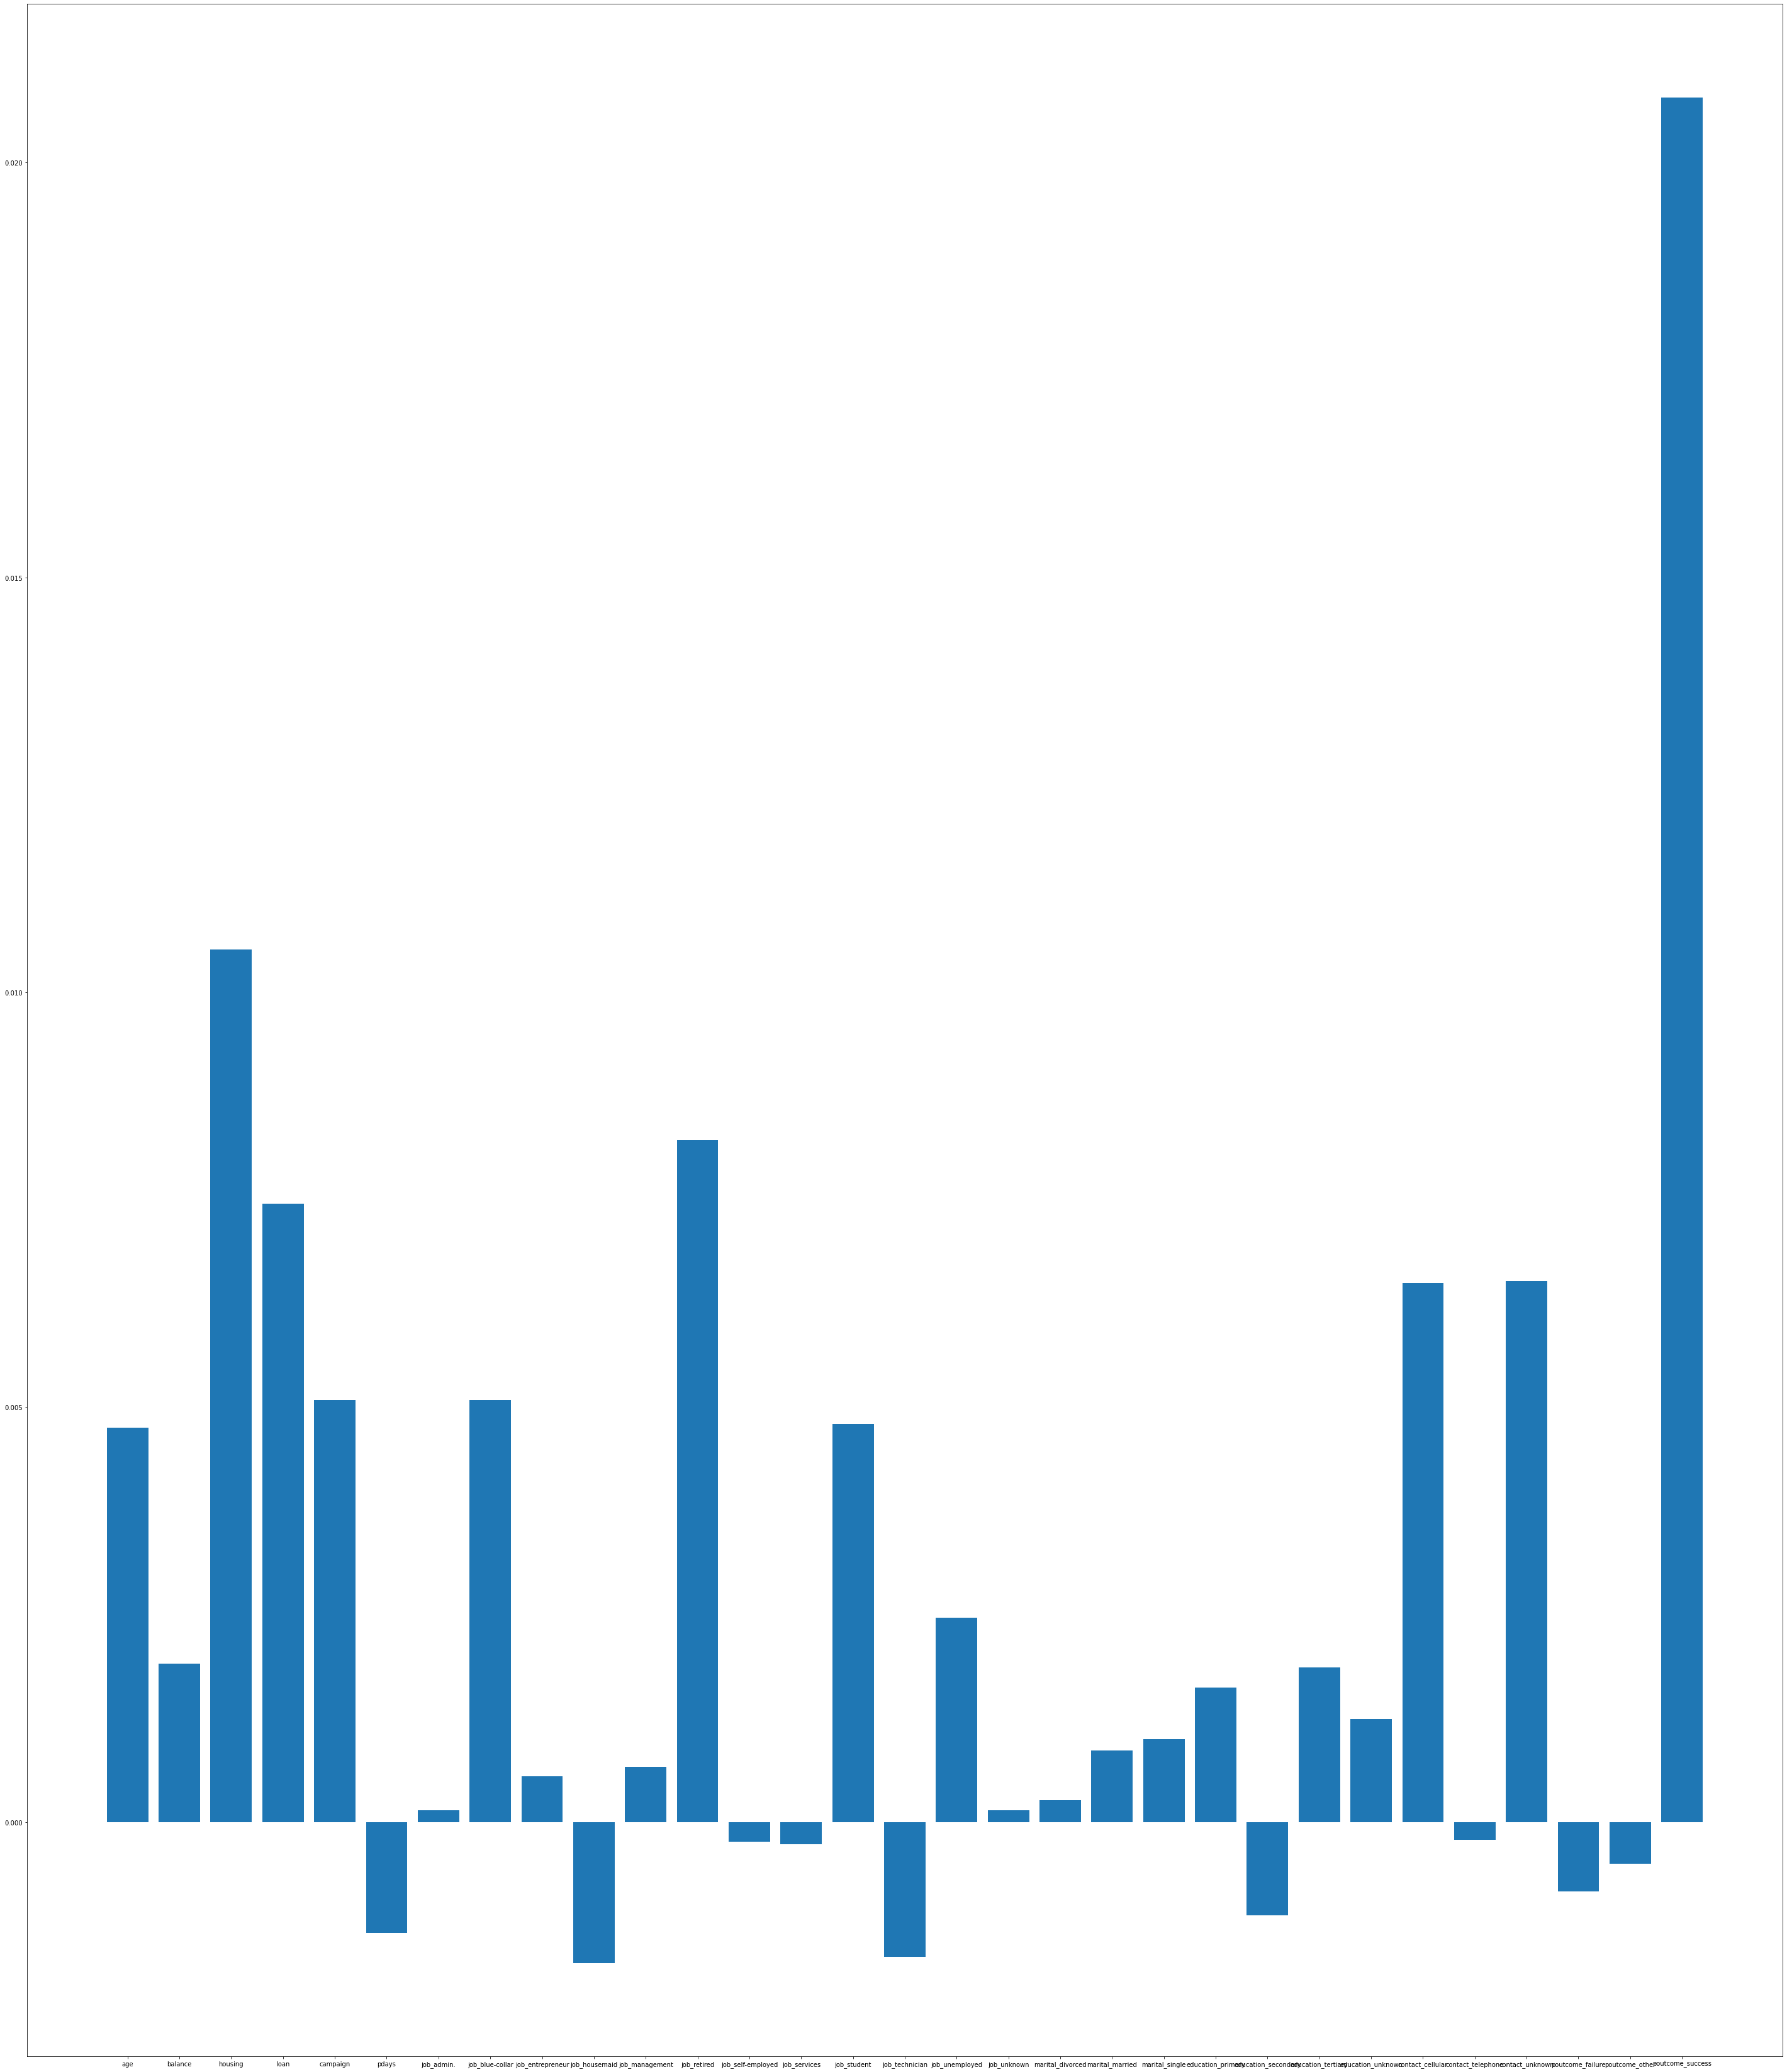

Wall time: 2.08 s


In [76]:
%%time
from sklearn.inspection import permutation_importance
model = model.fit(X_train, y_train)
results = permutation_importance(model, X_train, y_train, scoring='accuracy')
importance = results.importances_mean
important_features(importance)

### LDA Classifier

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
grid_search_dict['lda'] = model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
acc_score['lda'] = scores
print('Accuracy:{} ({})'.format (mean(scores), std(scores)))

Accuracy:0.6725646772340129 (0.018597031936527533)


In [78]:
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

Top 5 features : 

housing : 0.02730856528491219 

poutcome_success : 0.015983753434476177 

poutcome_failure : 0.011922112053518119 

campaign : 0.0113725958666826 

job_retired : 0.010703619639230656 



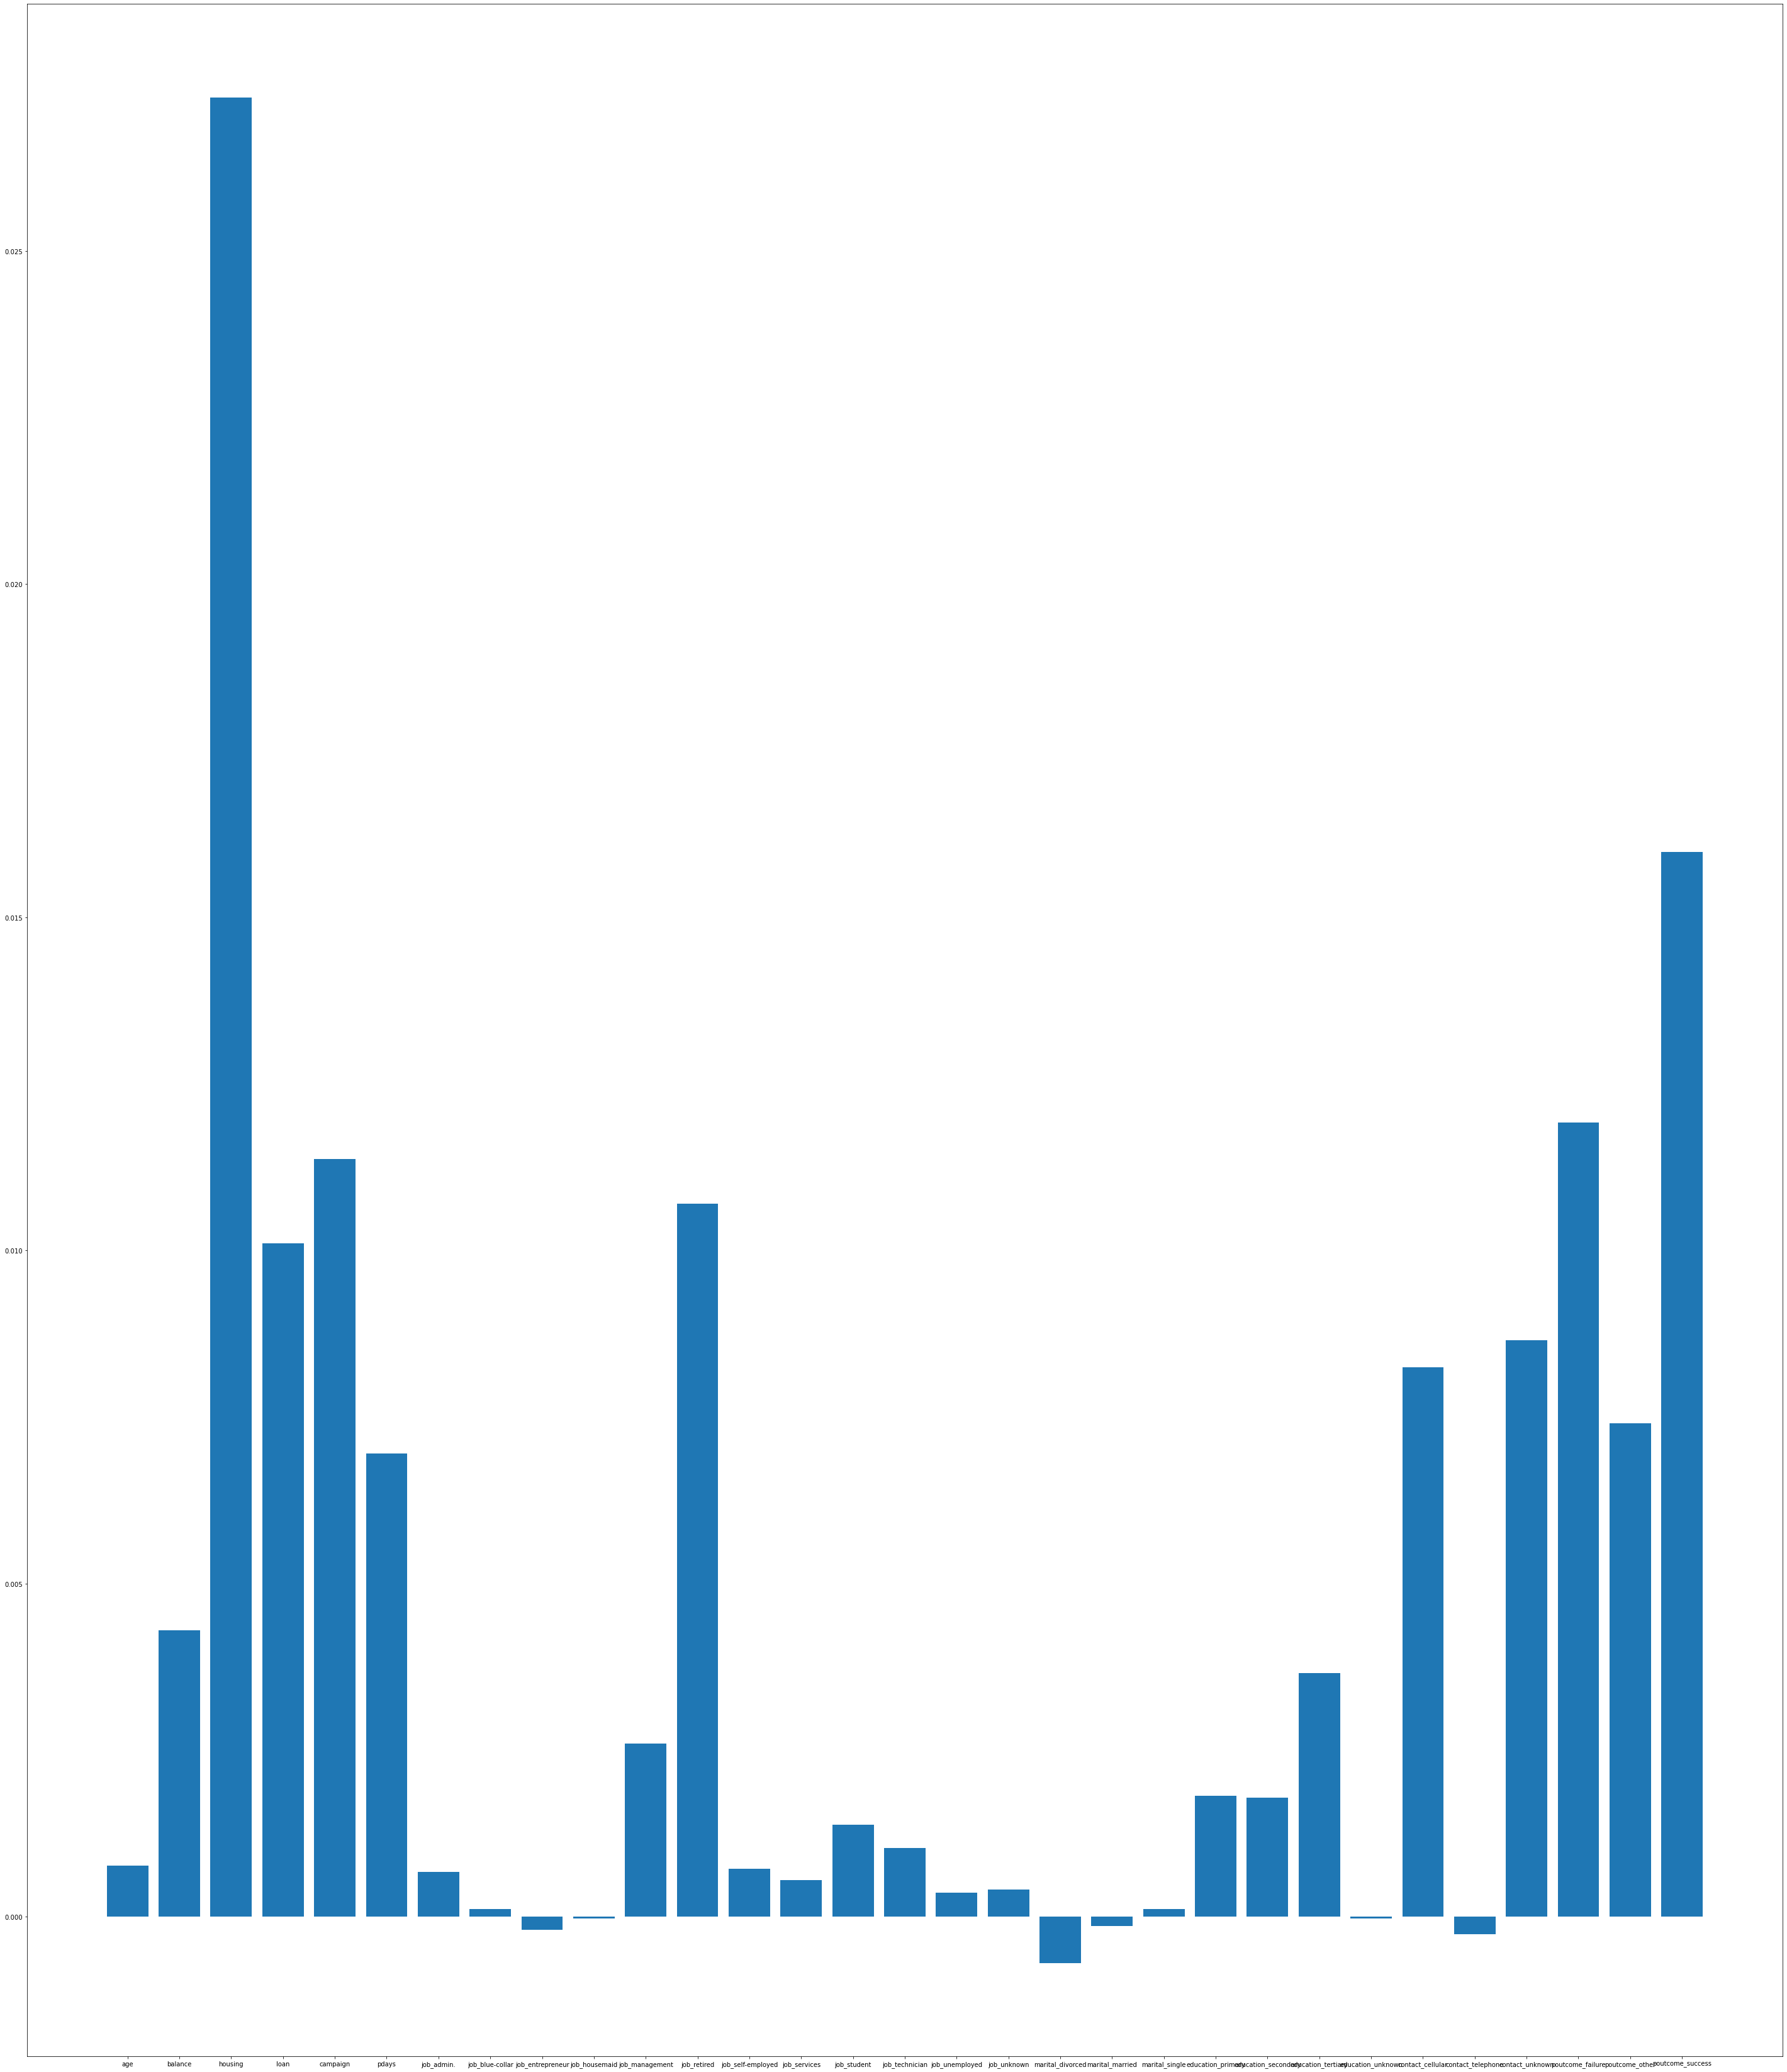

Wall time: 1.8 s


In [79]:
%%time
from sklearn.inspection import permutation_importance
model = model.fit(X_train, y_train)
results = permutation_importance(model, X_train, y_train, scoring='accuracy')
importance = results.importances_mean
important_features(importance)

### Choosing the best model

Text(0.5, 1.0, 'Accuracy - Training Set')

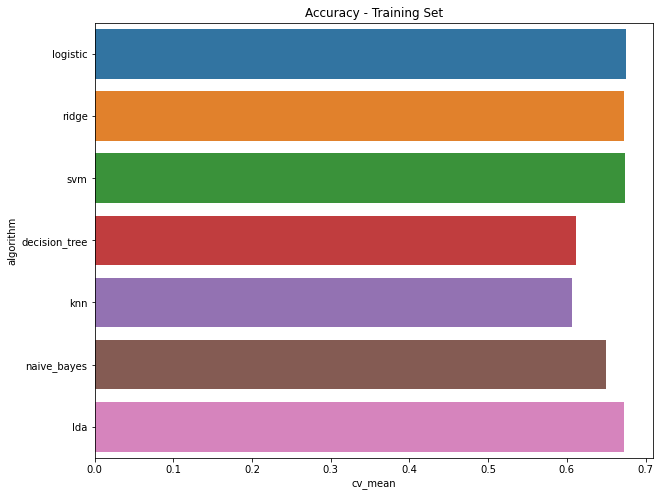

In [80]:
means = []
algorithms = []
max_accuracy = 0
best_algo = ""
for i in grid_search_dict.keys():
    means.append(mean(acc_score[i]))
    algorithms.append(i)
    if (max_accuracy < mean(acc_score[i])):
        best_algo = i
result = pd.DataFrame({'cv_mean' : means,'algorithm' : algorithms})
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "cv_mean", y ="algorithm",data = result,orient = "h",ax=ax).set_title('Accuracy - Training Set')

In [81]:
best_algo # Best algorithm in training

'lda'

## Testing and Results

In [82]:
from sklearn.metrics import classification_report,f1_score,confusion_matrix,roc_auc_score,accuracy_score,roc_curve
def calculate_metrics(y_test,pred):
    print('Report :\n',classification_report(y_test, pred))
    print("F1 Score : ",f1_score(pred,y_test))
    print('Confusion Matrix :\n',confusion_matrix(pred,y_test))
    print('AUC score :',roc_auc_score(y_test,pred))
    print("Accuracy :",accuracy_score(pred,y_test))
    
    print("\n\n")
    return {'report' : classification_report(y_test, pred),
           'f1' : f1_score(pred,y_test),
           'confusion_matrix' :confusion_matrix(pred,y_test),
          'AUC_score' : roc_auc_score(y_test,pred),
           "accuracy":accuracy_score(pred,y_test)}

In [83]:
from sklearn.metrics import confusion_matrix
test_scores = {}

for i in grid_search_dict.keys():
    print("****** {}  **********\n".format(i))
    model = grid_search_dict[i]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    result = calculate_metrics(y_test,pred)
    test_scores[i] = result

****** logistic  **********

Report :
               precision    recall  f1-score   support

           0       0.69      0.76      0.72      1453
           1       0.71      0.63      0.67      1338

    accuracy                           0.70      2791
   macro avg       0.70      0.70      0.70      2791
weighted avg       0.70      0.70      0.70      2791

F1 Score :  0.6669303797468354
Confusion Matrix :
 [[1106  495]
 [ 347  843]]
AUC score : 0.6956143003959644
Accuracy : 0.6983160157649588



****** ridge  **********

Report :
               precision    recall  f1-score   support

           0       0.68      0.77      0.72      1453
           1       0.71      0.61      0.66      1338

    accuracy                           0.70      2791
   macro avg       0.70      0.69      0.69      2791
weighted avg       0.70      0.70      0.69      2791

F1 Score :  0.6580956207312174
Confusion Matrix :
 [[1121  519]
 [ 332  819]]
AUC score : 0.6918074248732327
Accuracy : 0.6950913

### Accuracy

In [84]:
# Sort the algorithms by accuracy
test_scores = dict(sorted(test_scores.items(), key=lambda item: item[1]['accuracy']))
for i in test_scores.keys():
    print(i)
    print(" Accuracy : {}".format(test_scores[i]['accuracy'])) 
# We get the accuracy almost same as training dataset. It means there was no overfitting. It was achieved using Kfold cross-validation

decision_tree
 Accuracy : 0.6098172697957721
knn
 Accuracy : 0.6202078108204945
naive_bayes
 Accuracy : 0.6678609817269796
ridge
 Accuracy : 0.6950913651021139
lda
 Accuracy : 0.6950913651021139
svm
 Accuracy : 0.6961662486563955
logistic
 Accuracy : 0.6983160157649588


Text(0.5, 1.0, 'Accuracy - Test Set')

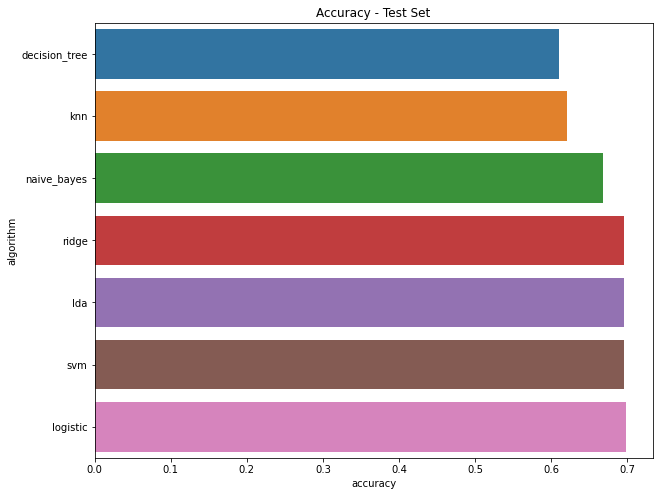

In [85]:
cols = ['f1','accuracy','AUC_score']
result_df = pd.DataFrame()
for col in cols:
    temp = []
    for i in test_scores.keys():
        temp.append(test_scores[i][col])
    result_df[col] = temp
result_df['average_of_metrics'] = result_df.mean(axis=1)
result_df['algorithm'] = test_scores.keys()
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "accuracy", y ="algorithm",data = result_df,orient = "h",ax=ax).set_title('Accuracy - Test Set')

In [86]:
result_df

,f1,accuracy,AUC_score,average_of_metrics,algorithm
0,0.582278,0.609817,0.608133,0.600076,decision_tree
1,0.561258,0.620208,0.615717,0.599061,knn
2,0.622711,0.667861,0.664058,0.651543,naive_bayes
3,0.658096,0.695091,0.691807,0.681665,ridge
4,0.658096,0.695091,0.691807,0.681665,lda
5,0.660256,0.696166,0.692988,0.683137,svm
6,0.666930,0.698316,0.695614,0.686954,logistic


### ROC and AUC Score

In [87]:
# Sort the algorithms by AUC score
test_scores = dict(sorted(test_scores.items(), key=lambda item: item[1]['AUC_score']))
for i in test_scores.keys():
    print(i)
    print(" AUC_score : {}".format(test_scores[i]['AUC_score'])) 

decision_tree
 AUC_score : 0.6081333193423842
knn
 AUC_score : 0.6157169795598406
naive_bayes
 AUC_score : 0.6640575089732392
ridge
 AUC_score : 0.6918074248732327
lda
 AUC_score : 0.6918074248732327
svm
 AUC_score : 0.6929876540161739
logistic
 AUC_score : 0.6956143003959644


Text(0.5, 1.0, 'AUC Score - Test Set')

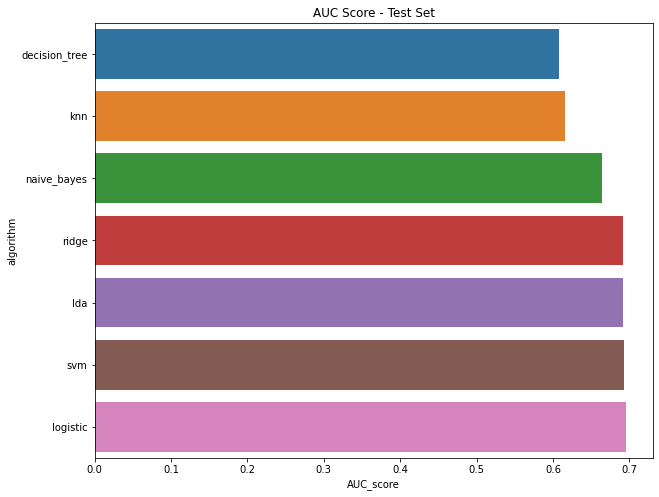

In [88]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "AUC_score", y ="algorithm",data = result_df,orient = "h",ax=ax).set_title('AUC Score - Test Set')

### F1 Score

In [89]:
# Sort the algorithms by F1 score
test_scores = dict(sorted(test_scores.items(), key=lambda item: item[1]['f1']))
for i in test_scores.keys():
    print(i)
    print(" F1 Score : {}".format(test_scores[i]['f1'])) 

knn
 F1 Score : 0.5612582781456953
decision_tree
 F1 Score : 0.5822784810126581
naive_bayes
 F1 Score : 0.6227106227106227
ridge
 F1 Score : 0.6580956207312174
lda
 F1 Score : 0.6580956207312174
svm
 F1 Score : 0.6602564102564102
logistic
 F1 Score : 0.6669303797468354


Text(0.5, 1.0, 'F1 - Test Set')

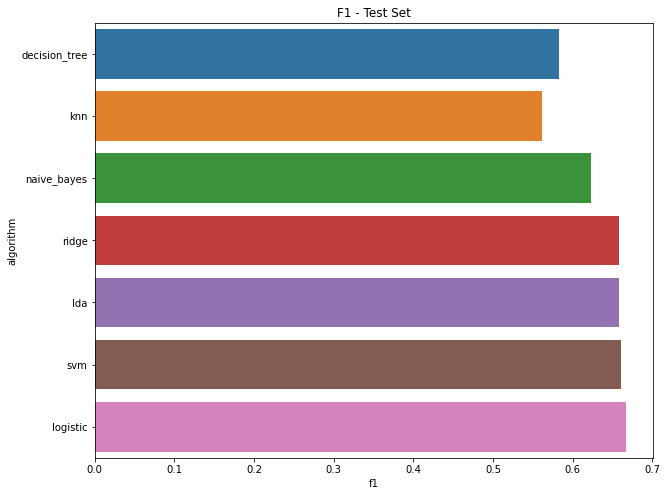

In [90]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "f1", y ="algorithm",data = result_df,orient = "h",ax=ax).set_title('F1 - Test Set')

### Conclusion

In [91]:
# Therefore, LDA gives the best result for the dataset with 68% accuracy.There was no overfitting as we get the same accuracy
# in both training and test set. Also the training times are favorable.

Text(0.5, 1.0, 'Av. of Metrics - Test Set')

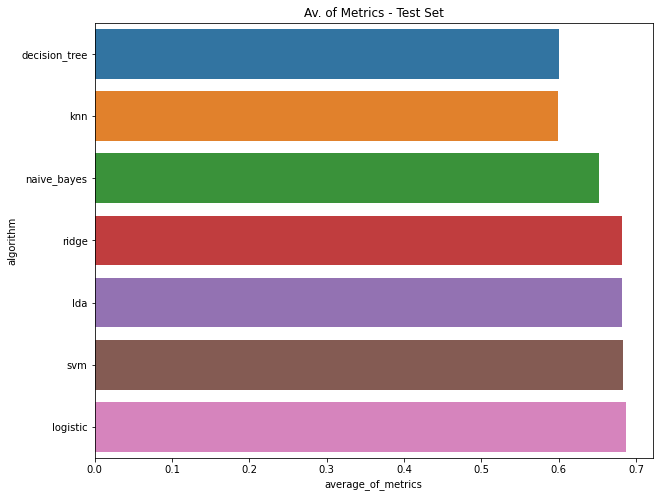

In [92]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "average_of_metrics", y ="algorithm",data = result_df,orient = "h",ax=ax).set_title('Av. of Metrics - Test Set')

In [93]:
result_df.loc[result_df['average_of_metrics'].idxmax()] # Best algorithm after testing

f1                     0.66693
accuracy              0.698316
AUC_score             0.695614
average_of_metrics    0.686954
algorithm             logistic
Name: 6, dtype: object